In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from newbinswrangle import (get_pokemon, prepare_pokemon, train_validate_test, get_object_cols, get_numeric_X_cols, ready_for_battle,
pokemon_split, split_X_y, standard_scale_data)

from explore import get_pokemon_heatmap, explore_univariate, histplot, count_and_histplots, scatterplot, create_cluster, create_scatter_plot, make_cluster, inertia, chi2test

from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import statsmodels.api as sm

In [2]:
df = get_pokemon()

In [3]:
df = ready_for_battle(df)

In [4]:
df.shape

(1045, 57)

In [5]:
df = df.drop(columns=['catch_rate'])

In [6]:
def pokemon_split(df):
    #splitting our data
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.simplified_catch_rate)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.simplified_catch_rate)
    return train, validate, test

In [7]:
train, validate, test = pokemon_split(df)

In [8]:
train.shape, validate.shape, test.shape

((585, 56), (251, 56), (209, 56))

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'simplified_catch_rate')

<AxesSubplot:title={'center':'Features Correlated with Catch Rates'}>

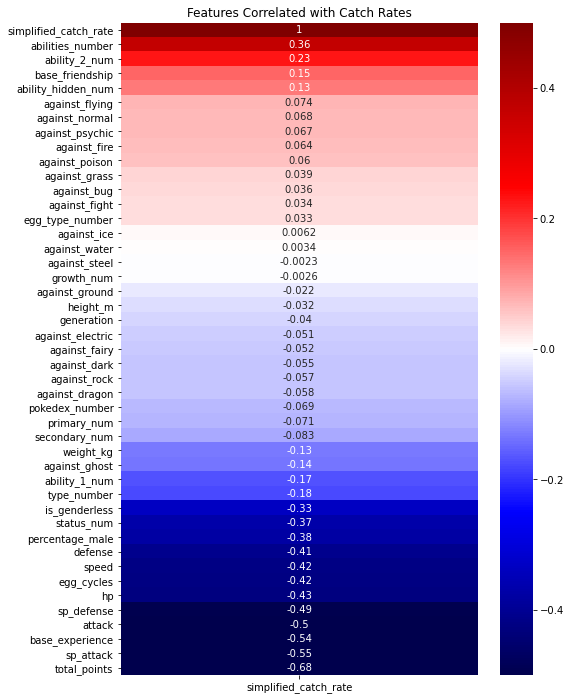

In [10]:
get_pokemon_heatmap(train)

In [11]:
univariate_stuff = train[['total_points','sp_attack','base_experience','attack','hp','sp_defense','egg_cycles','percentage_male','is_genderless','abilities_number']]

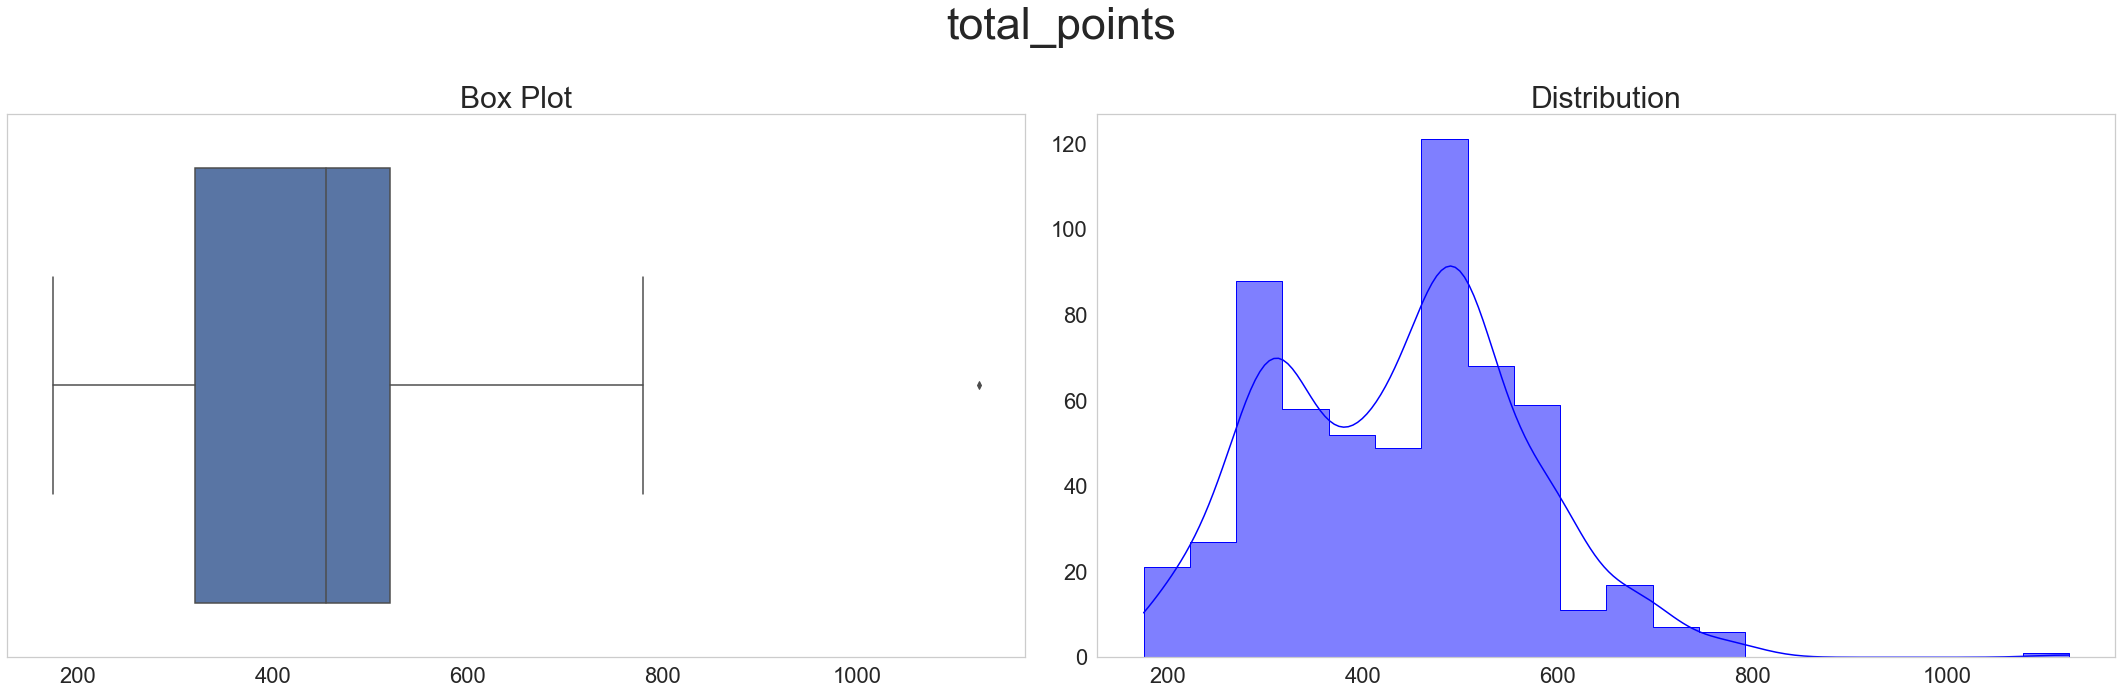

Summary Statistics for total_points
count     585.000000
mean      438.774359
std       129.332892
min       175.000000
25%       320.000000
50%       455.000000
75%       520.000000
max      1125.000000
Name: total_points, dtype: float64


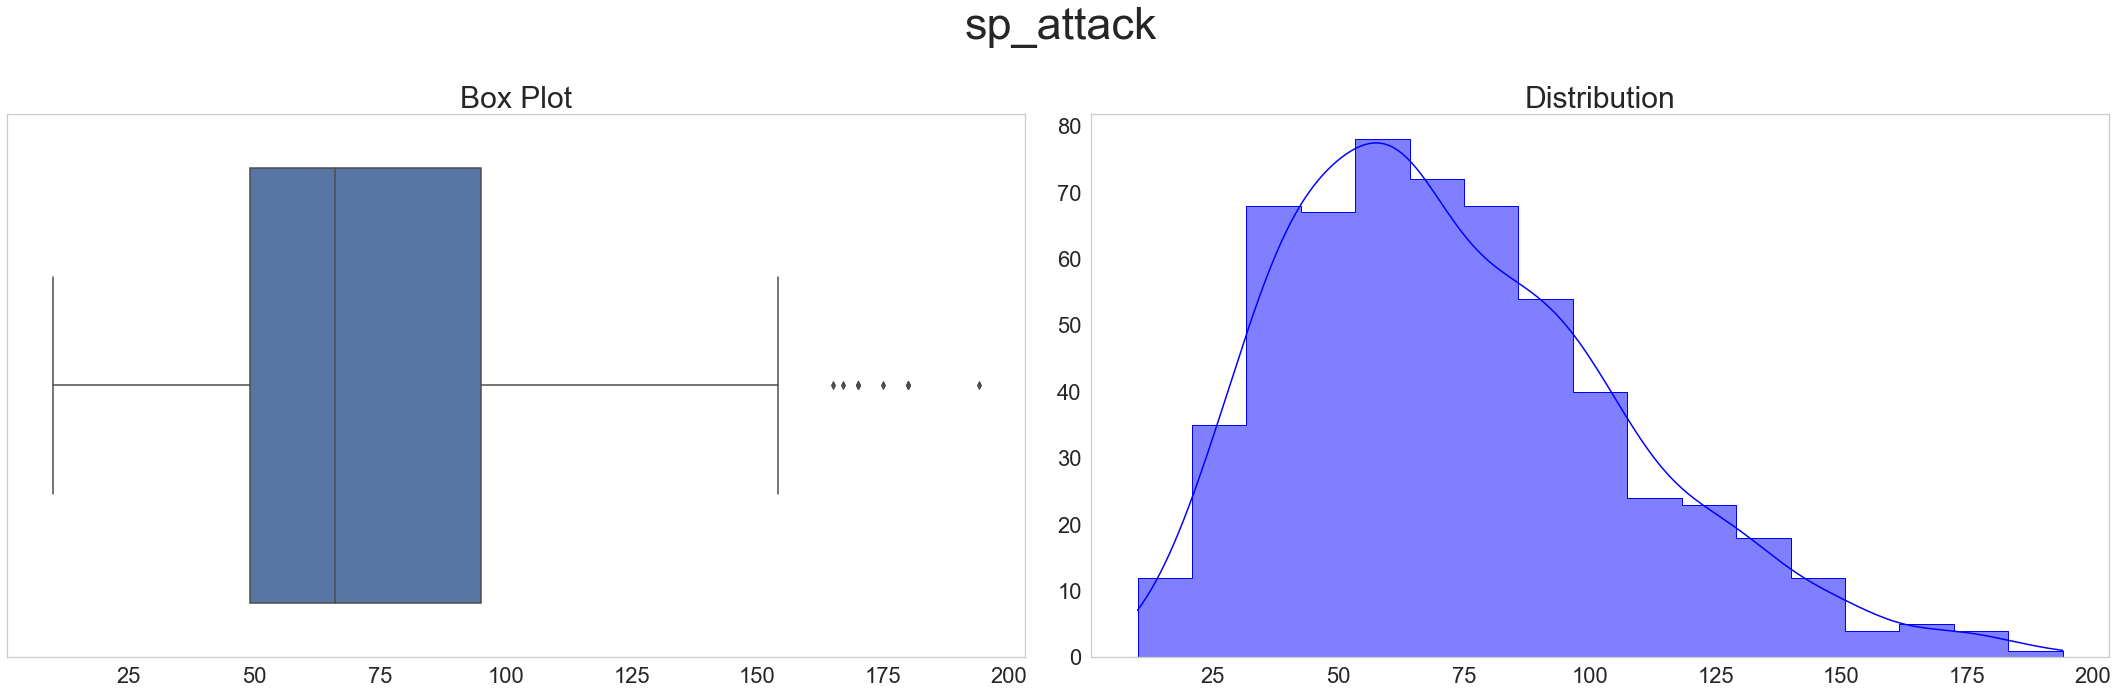

Summary Statistics for sp_attack
count    585.000000
mean      73.490598
std       33.751920
min       10.000000
25%       49.000000
50%       66.000000
75%       95.000000
max      194.000000
Name: sp_attack, dtype: float64


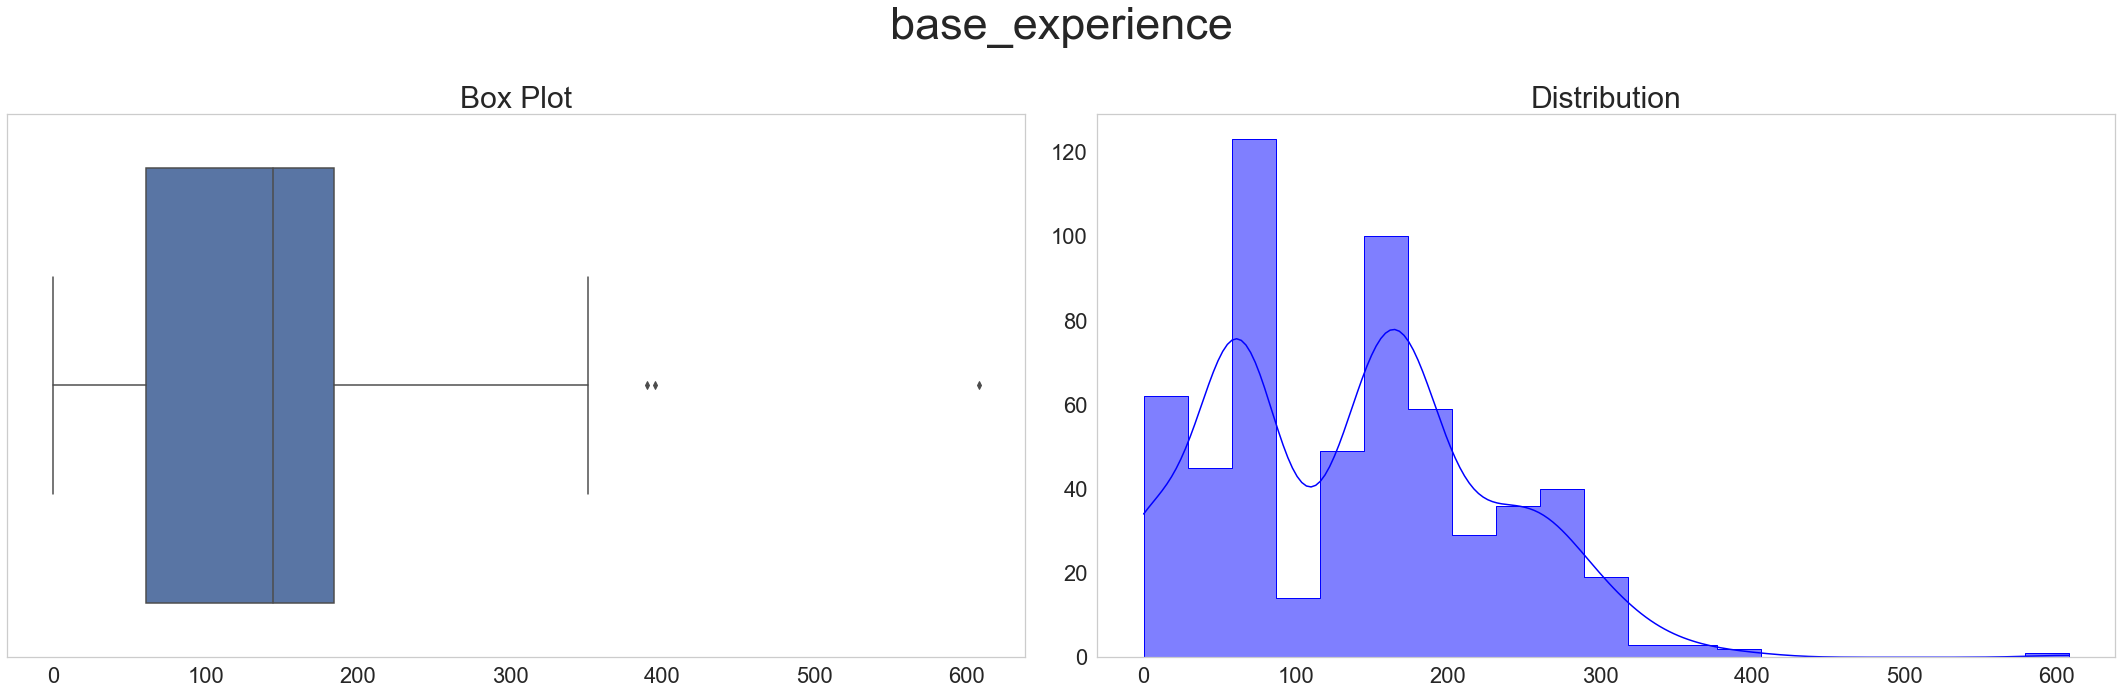

Summary Statistics for base_experience
count    585.000000
mean     137.270085
std       91.200830
min        0.000000
25%       61.000000
50%      144.000000
75%      184.000000
max      608.000000
Name: base_experience, dtype: float64


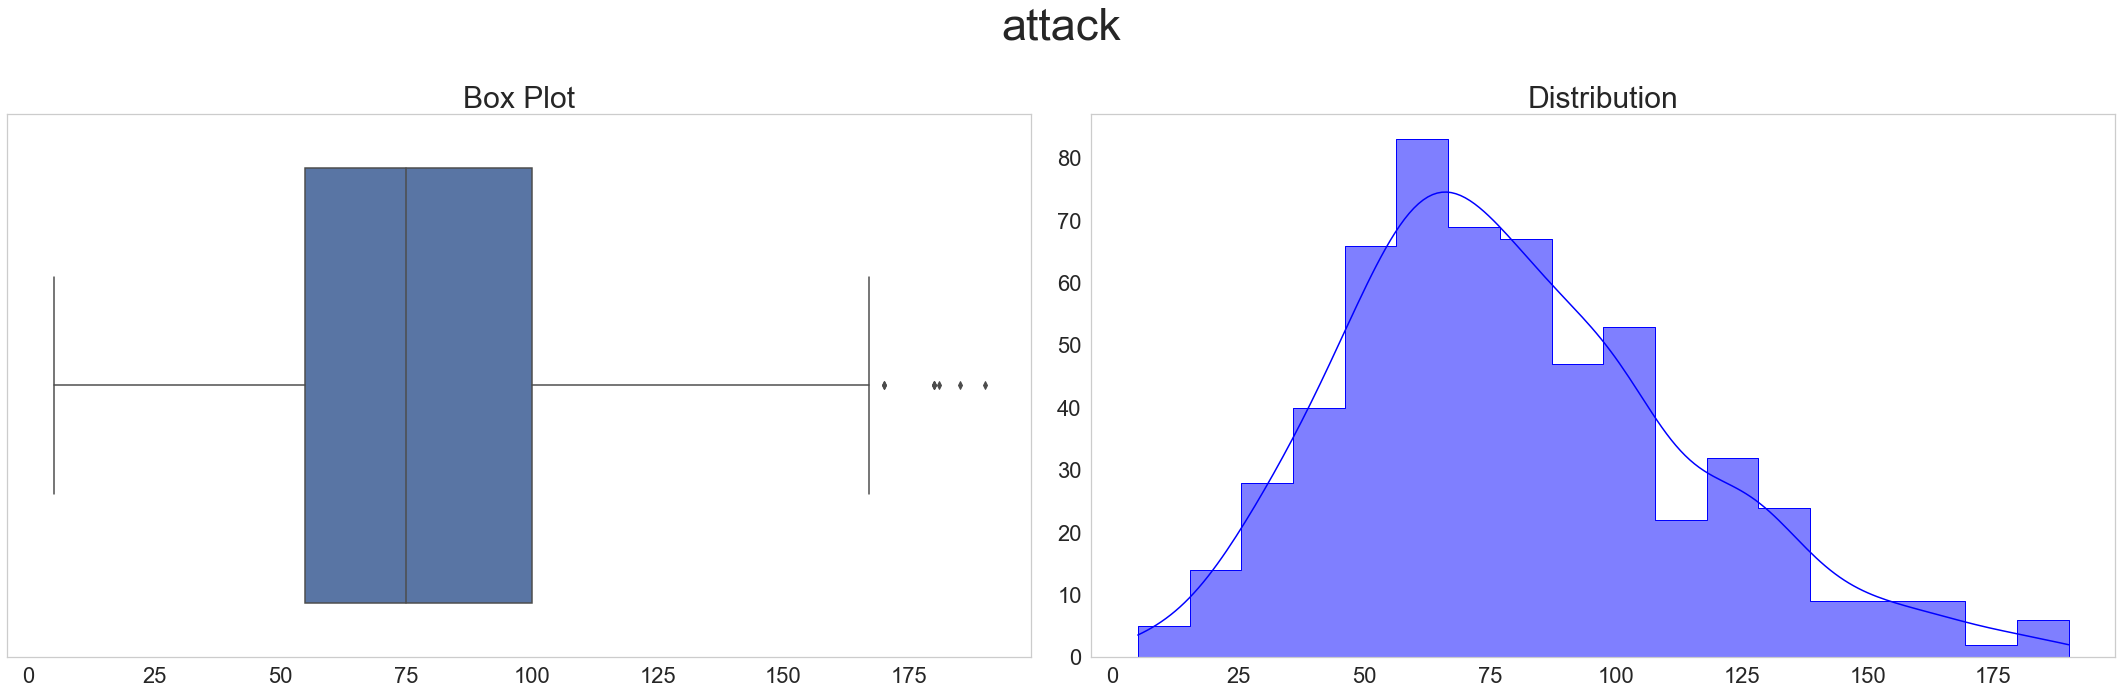

Summary Statistics for attack
count    585.000000
mean      79.993162
std       34.141426
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64


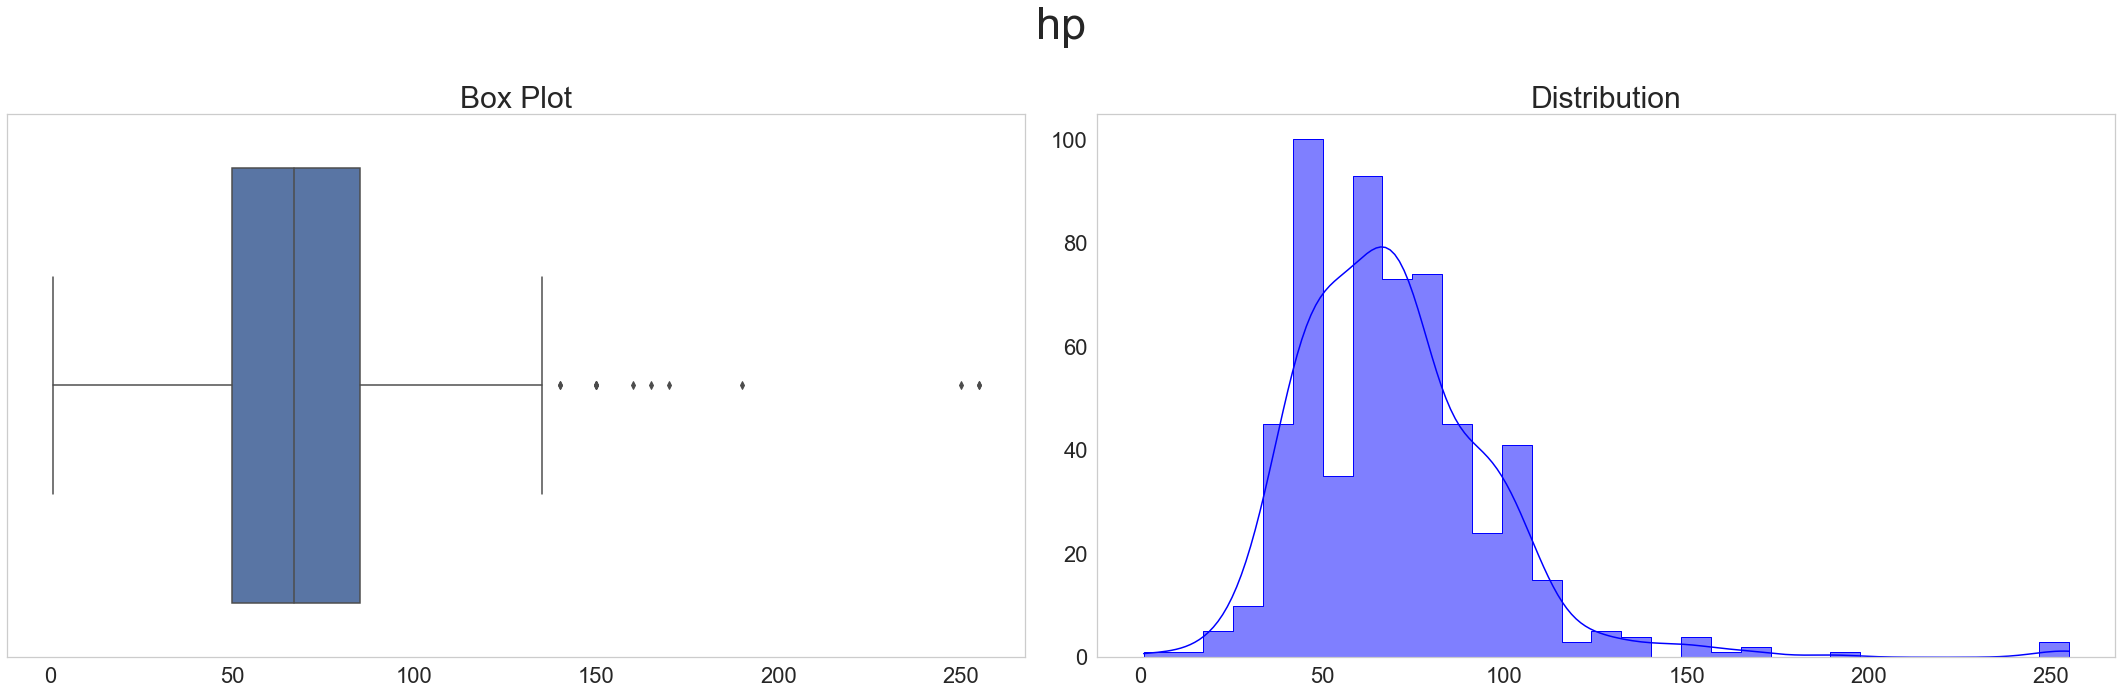

Summary Statistics for hp
count    585.000000
mean      70.234188
std       28.019896
min        1.000000
25%       50.000000
50%       67.000000
75%       85.000000
max      255.000000
Name: hp, dtype: float64


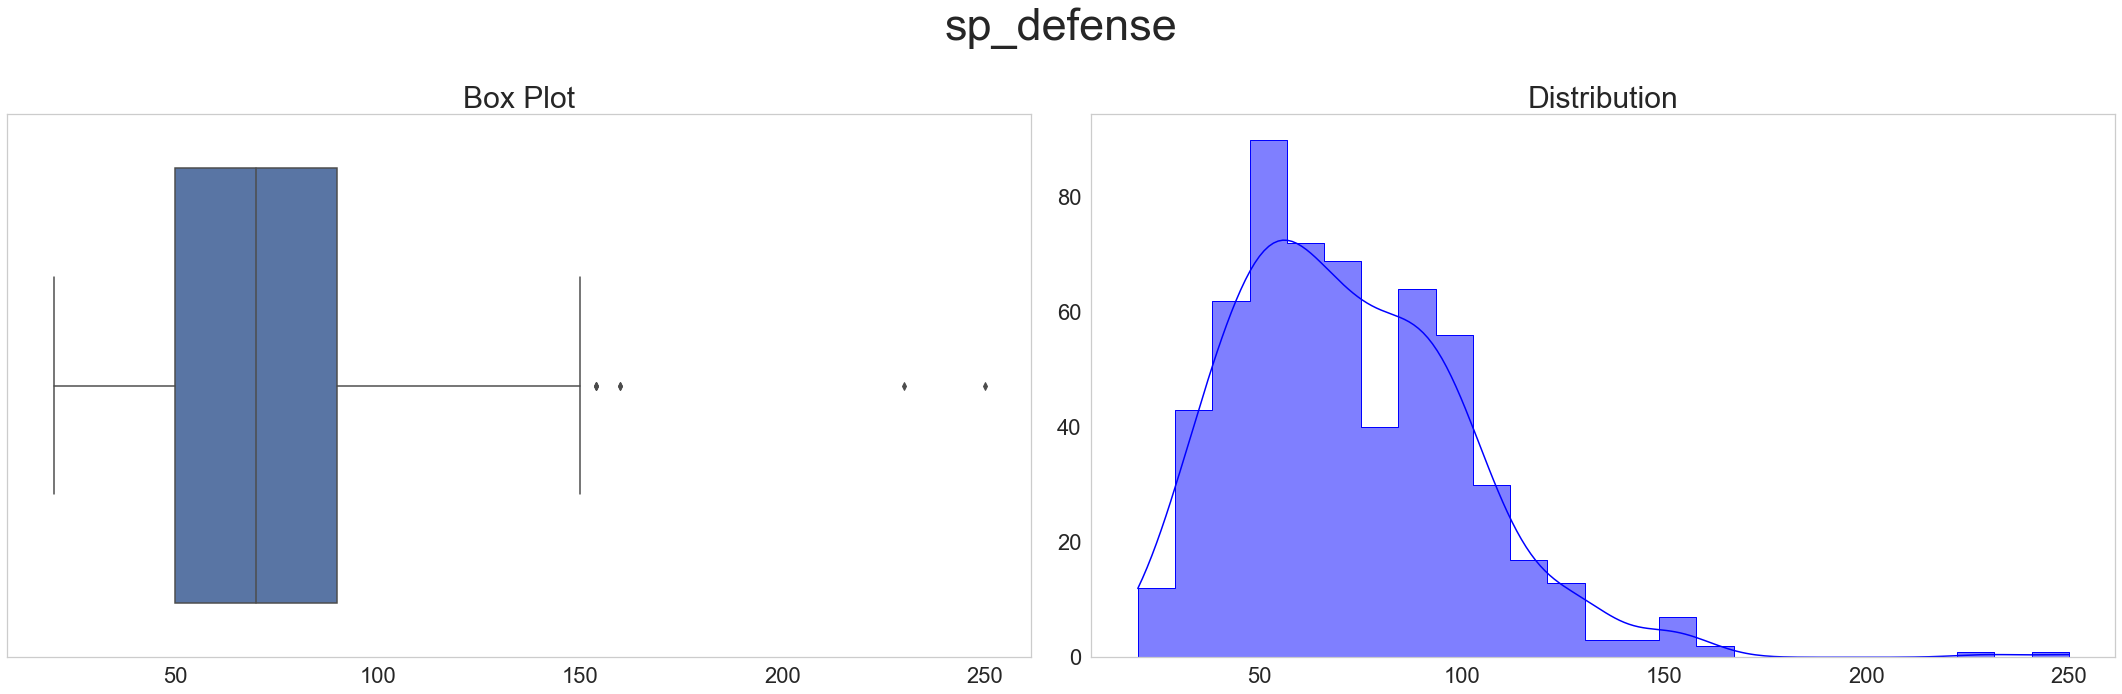

Summary Statistics for sp_defense
count    585.000000
mean      72.377778
std       29.505848
min       20.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      250.000000
Name: sp_defense, dtype: float64


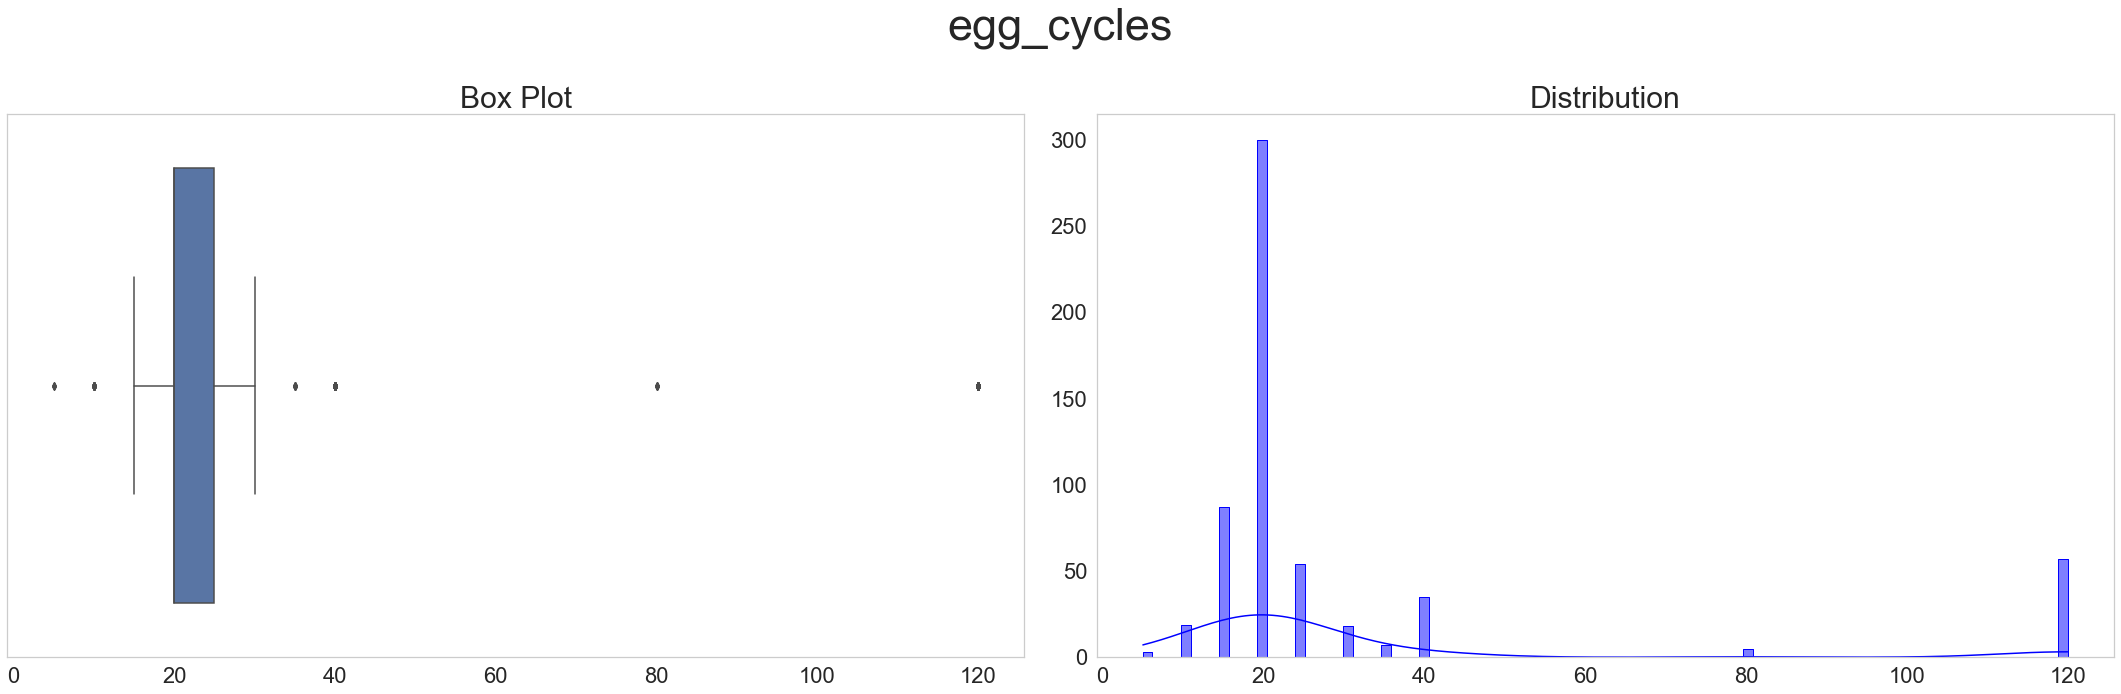

Summary Statistics for egg_cycles
count    585.000000
mean      31.256410
std       30.333521
min        5.000000
25%       20.000000
50%       20.000000
75%       25.000000
max      120.000000
Name: egg_cycles, dtype: float64


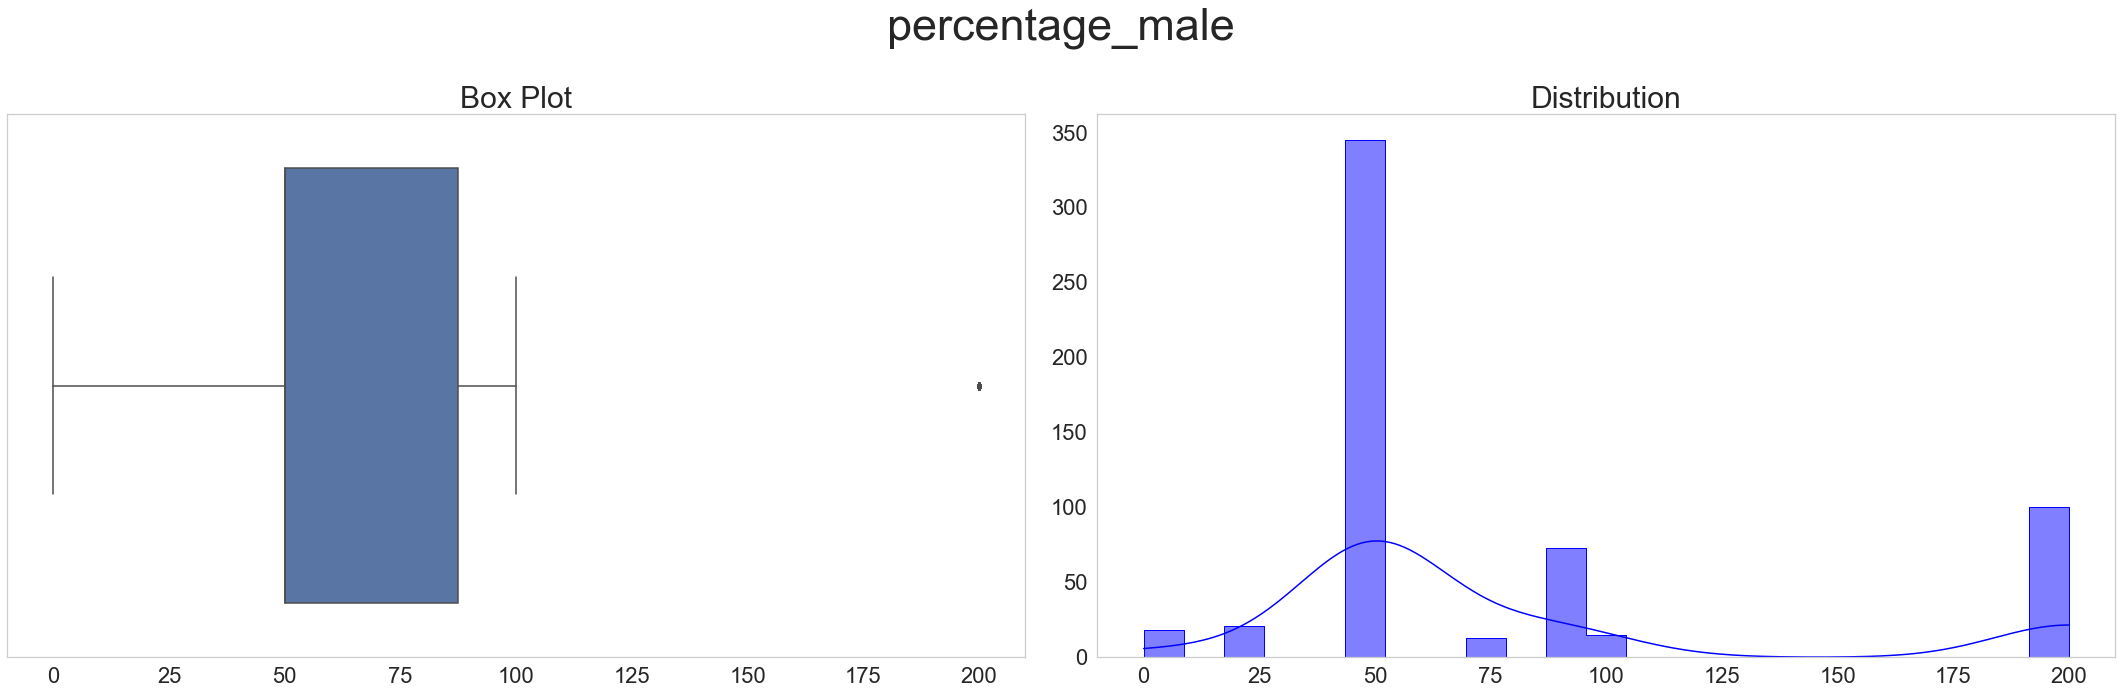

Summary Statistics for percentage_male
count    585.000000
mean      79.722222
std       57.630304
min        0.000000
25%       50.000000
50%       50.000000
75%       87.500000
max      200.000000
Name: percentage_male, dtype: float64


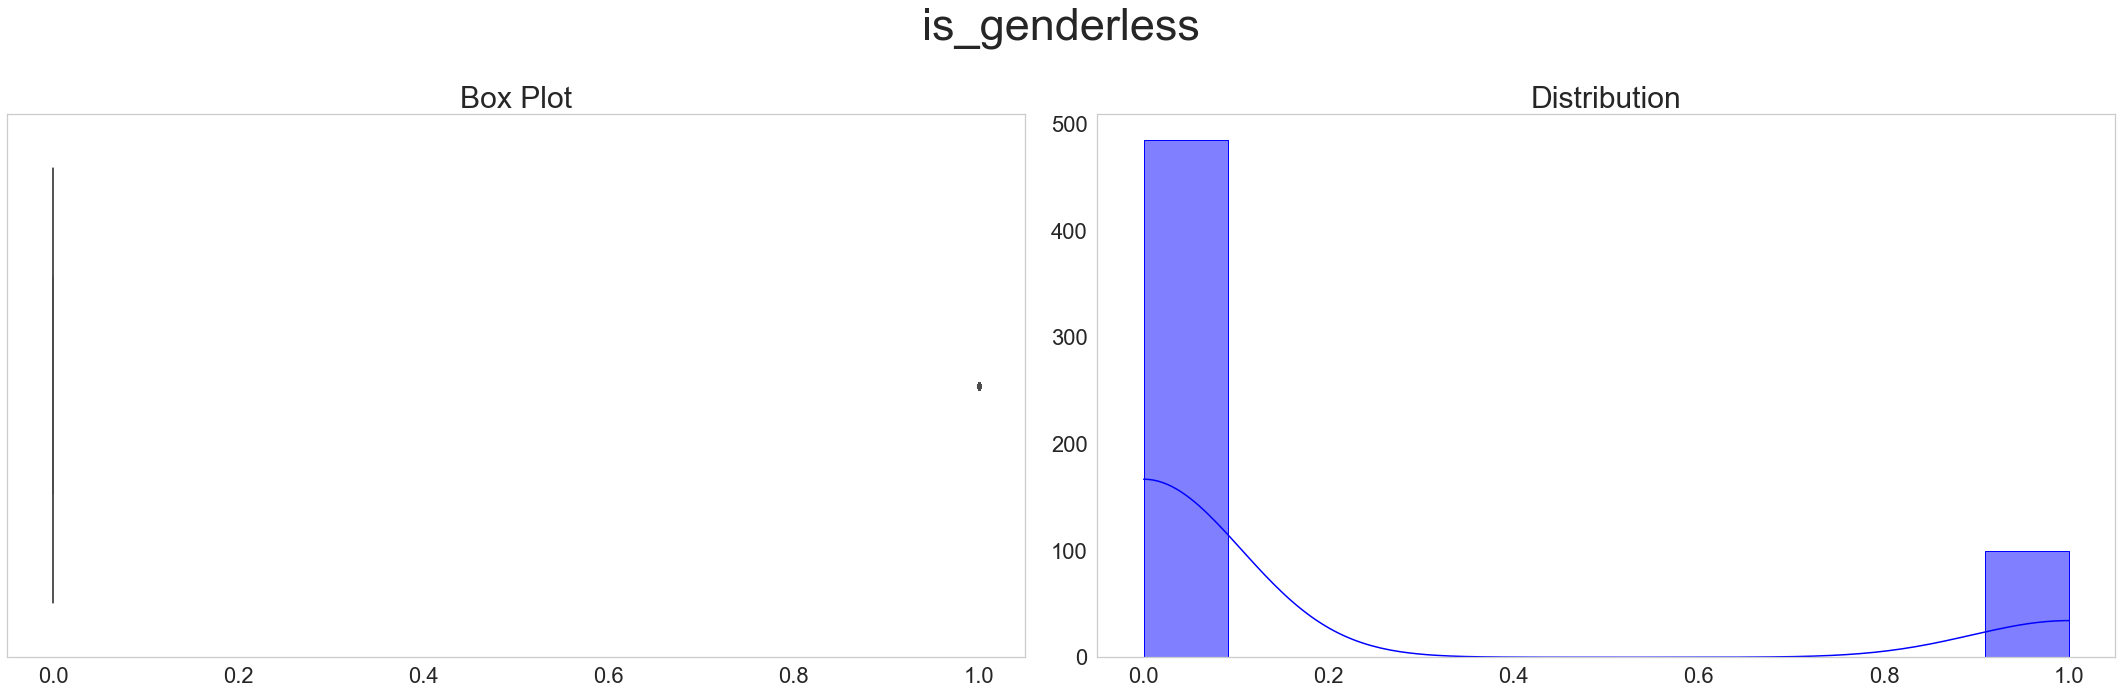

Summary Statistics for is_genderless
count    585.000000
mean       0.170940
std        0.376779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_genderless, dtype: float64


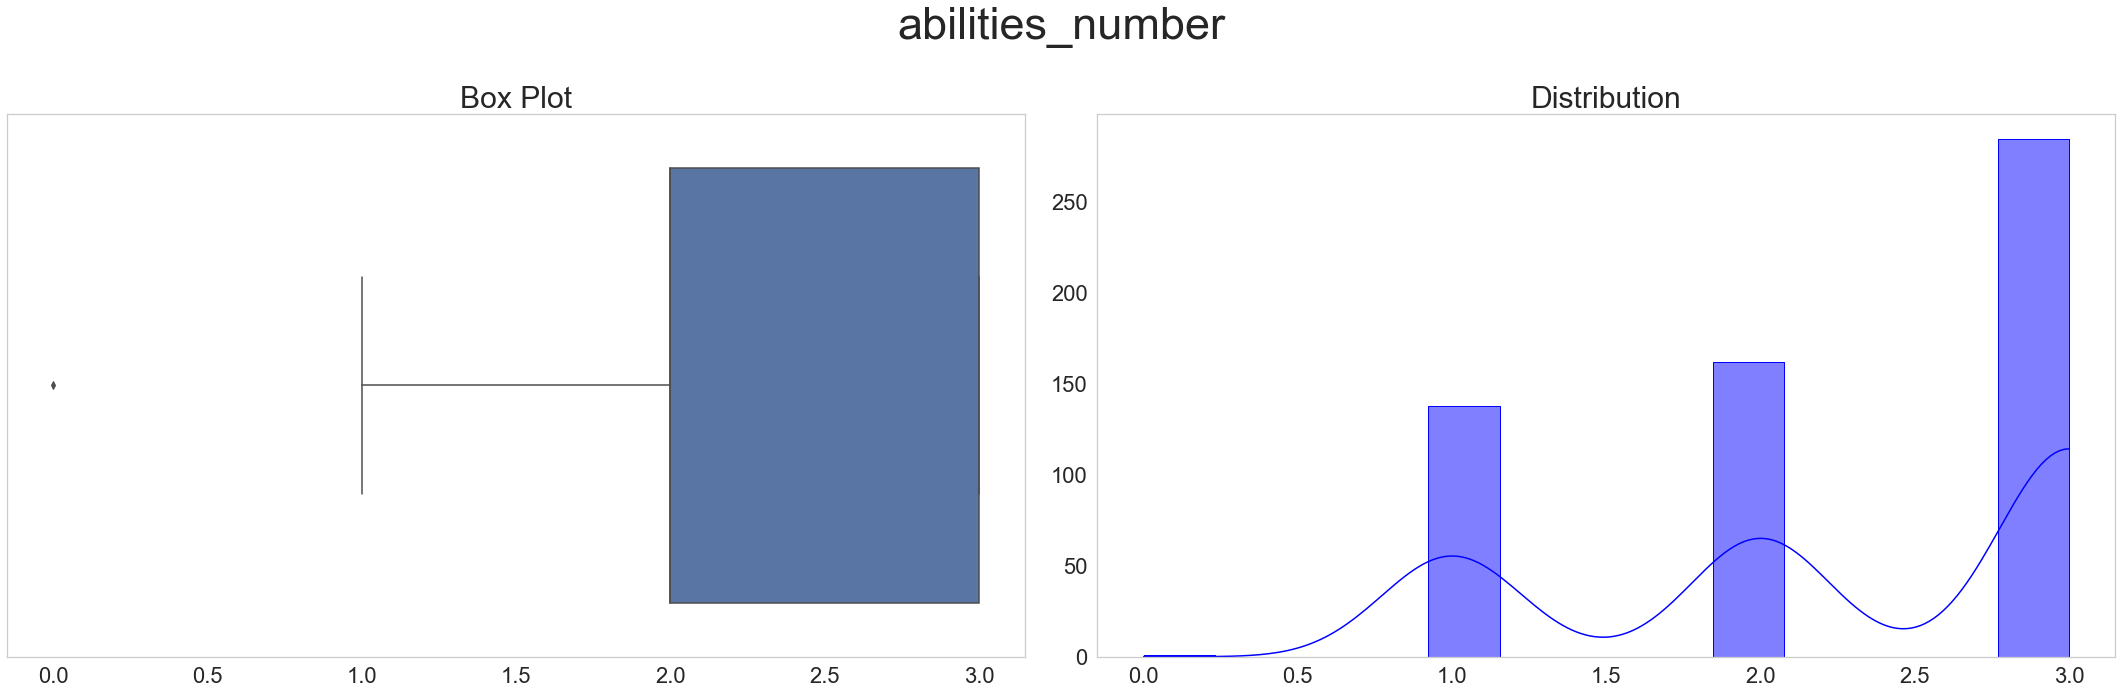

Summary Statistics for abilities_number
count    585.000000
mean       2.246154
std        0.817775
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: abilities_number, dtype: float64


In [12]:
for i in univariate_stuff:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

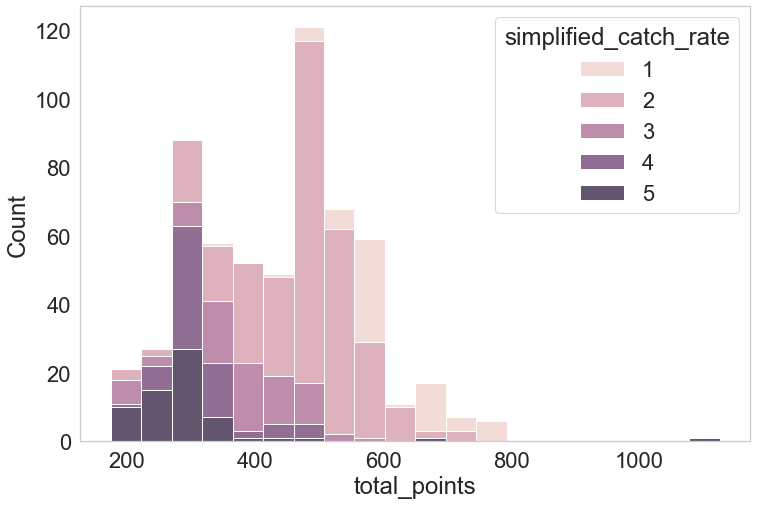

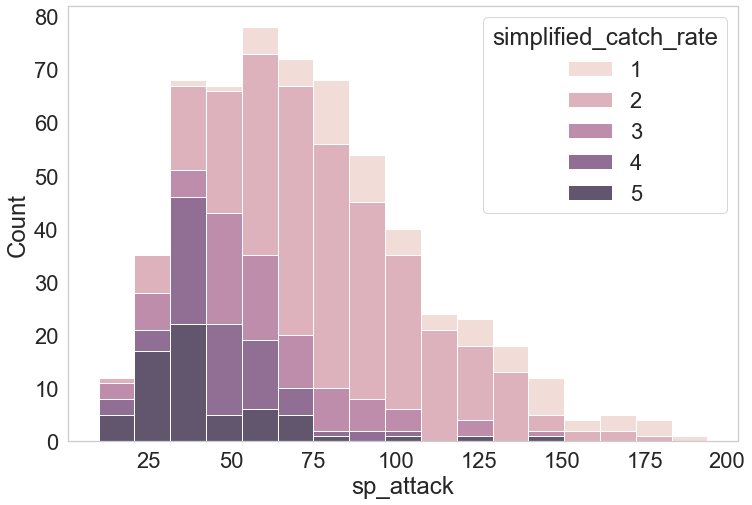

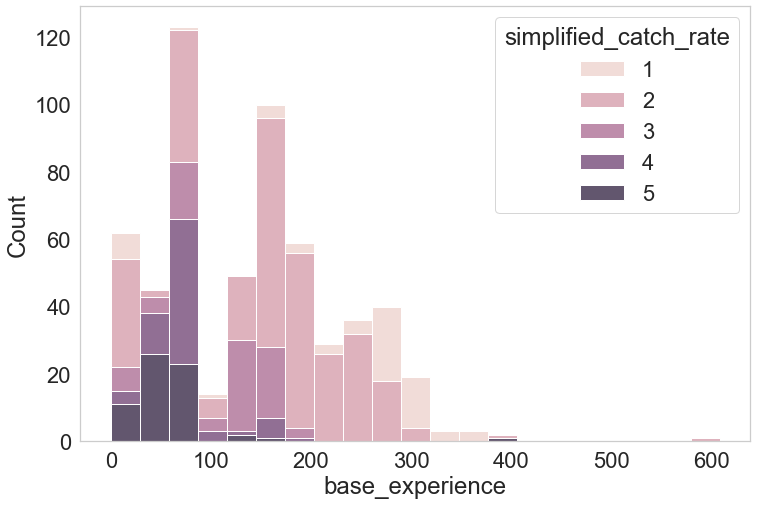

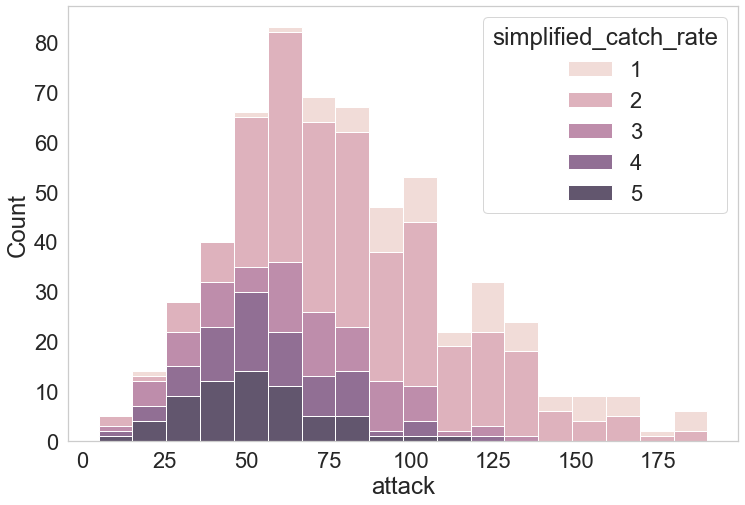

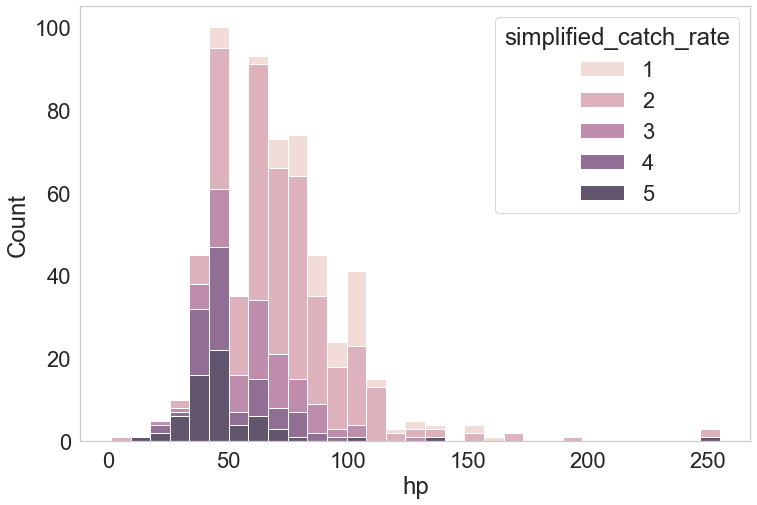

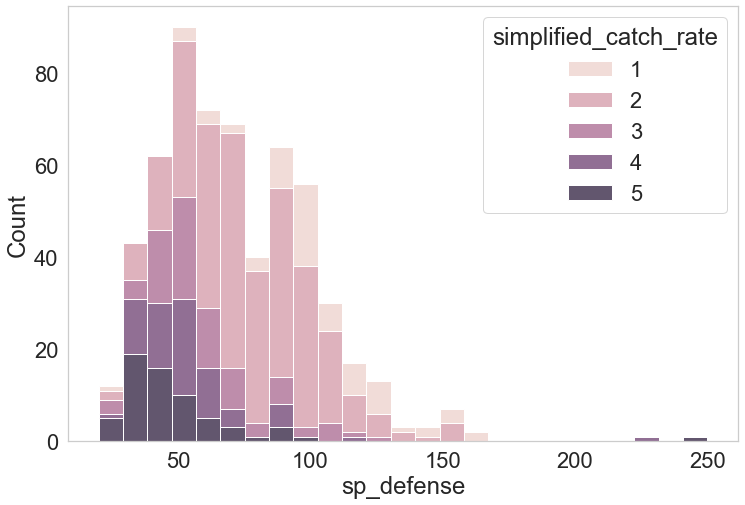

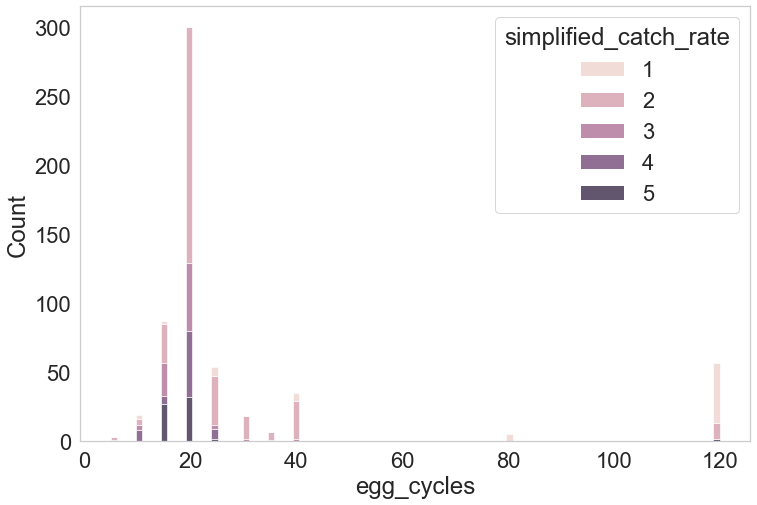

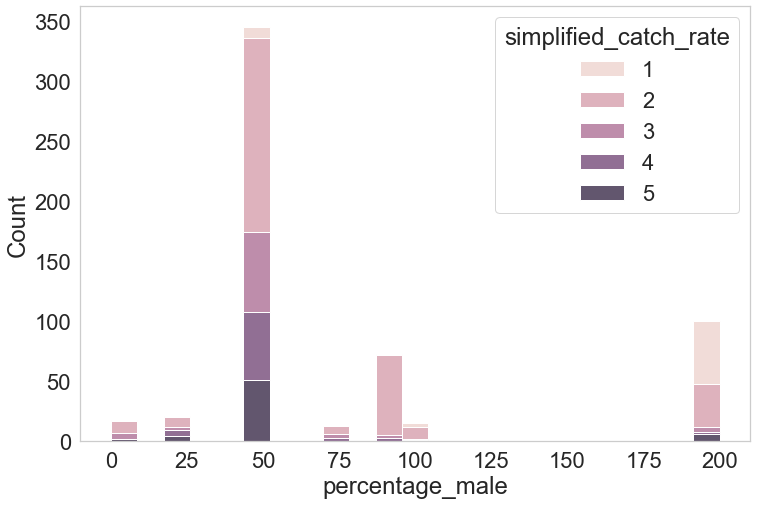

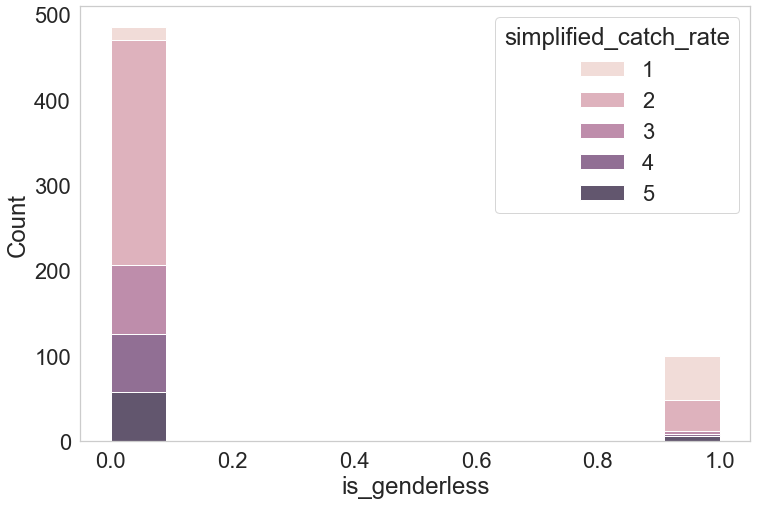

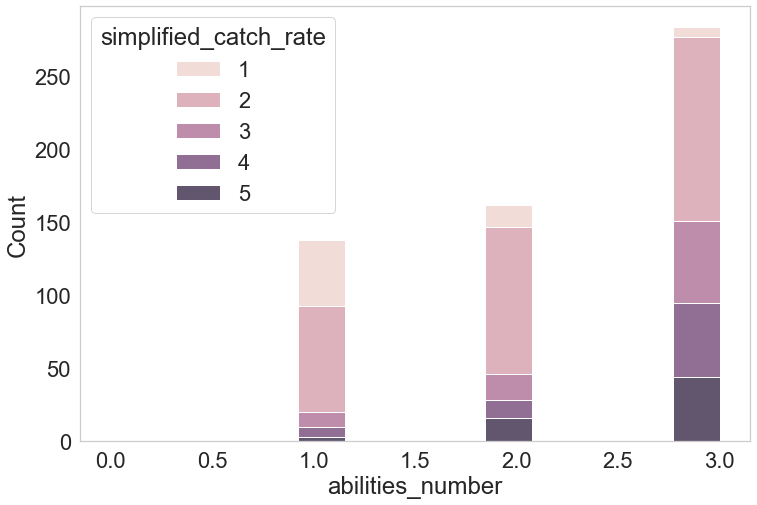

In [13]:
for i in univariate_stuff:
    histplot(train, i, 'simplified_catch_rate')

In [14]:
# plt.figure(figsize=(16,8))
# sns.scatterplot(x='total_points',y='attack',data=train,hue='simplified_catch_rate', palette='nipy_spectral')
# plt.title('Total Pts and Attack', fontsize = 20)
# plt.show()

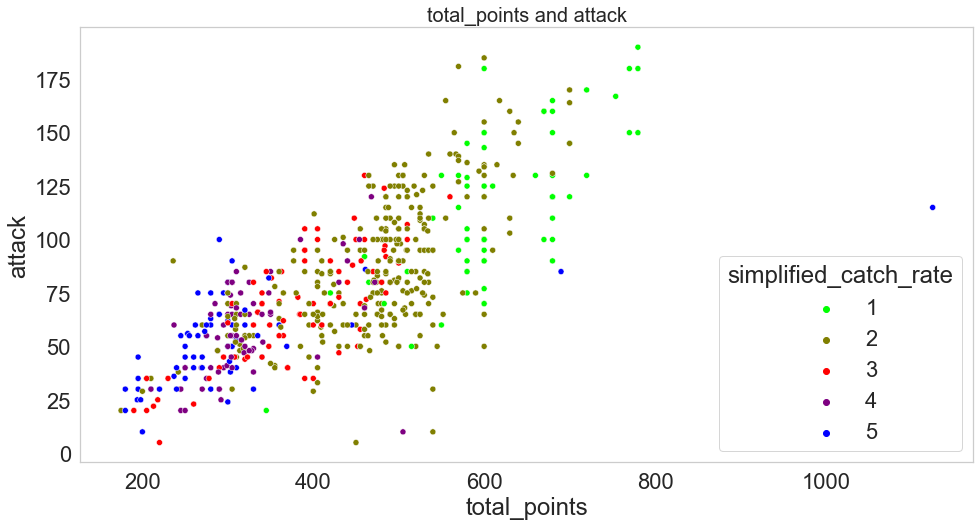

In [15]:
scatterplot(train,'total_points','attack')

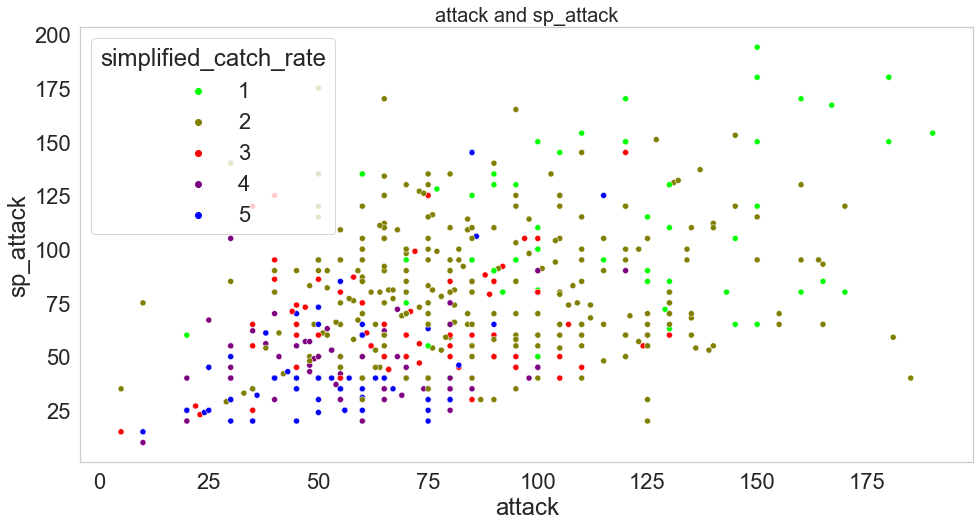

In [16]:
scatterplot(train, 'attack','sp_attack')

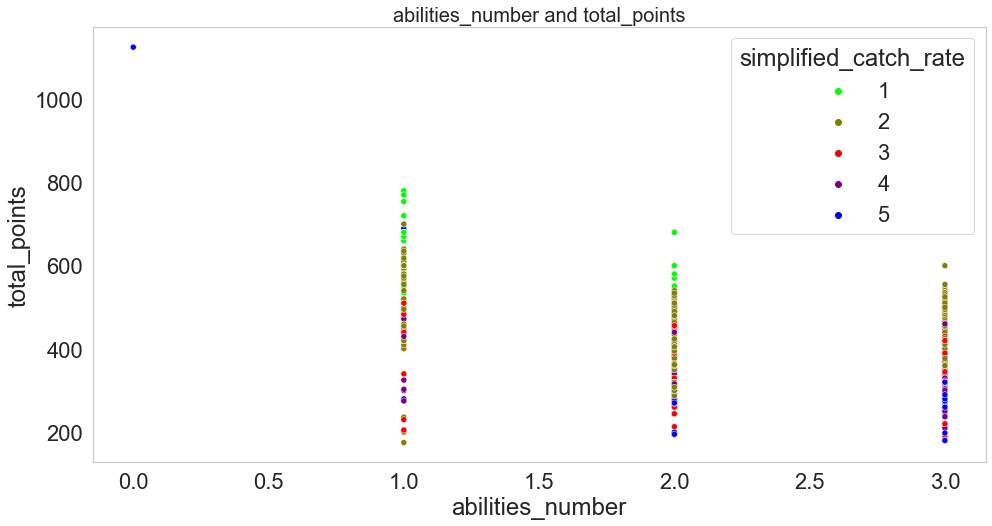

In [17]:
scatterplot(train, 'abilities_number','total_points')

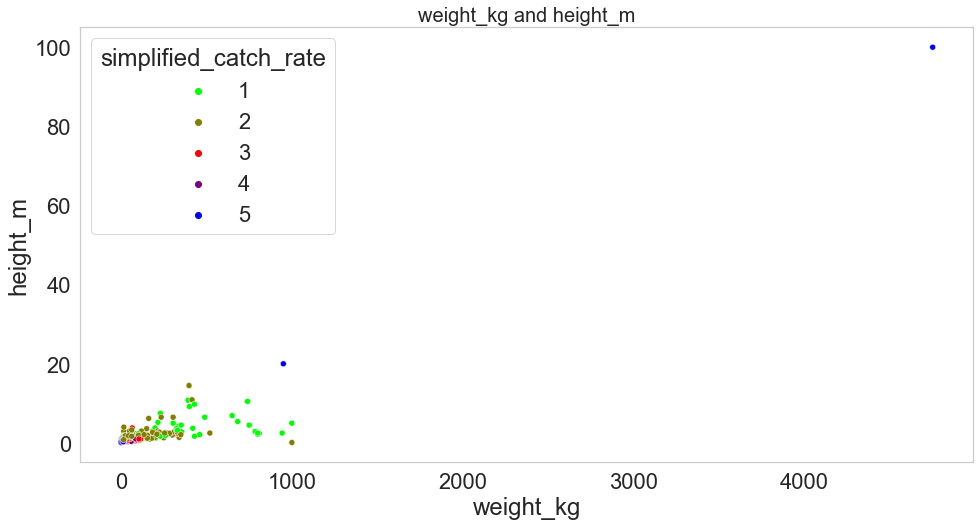

In [18]:
scatterplot(train, 'weight_kg','height_m')

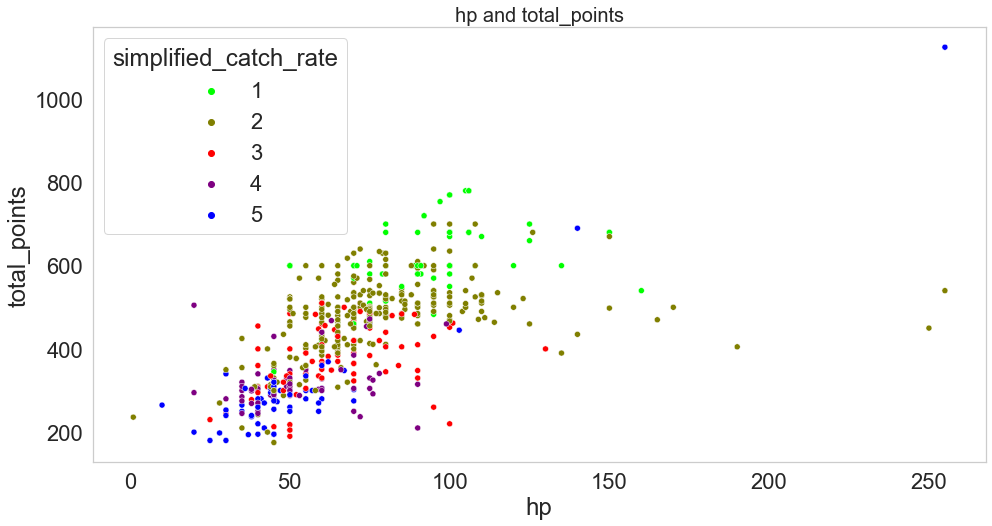

In [19]:
scatterplot(train, 'hp','total_points')

In [20]:
null_hypothesis =  "Genderless and catch rate are independent of each other."
alternative_hypothesis =  "Genderless and catch rate are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.is_genderless, train.simplified_catch_rate, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Genderless and catch rate are independent of each other.
There is evidence to suggest: Genderless and catch rate are not independent of each other.


In [21]:
# def chi2test(df, x, y):
#     a = 0.05 #a for alpha 

#     observed = pd.crosstab(x, y, margins = True)
#     chi2, p, degf, expected = stats.chi2_contingency(observed)
#     if p < a:
#         print(f'Reject null hypothesis. There is evidence to suggest they are not independent. p-value is {p}')
#     else:
#         print(f"Fail to reject the null hypothesis. There is not sufficient evidence to reject independence of these variables. p-value is {p}")

In [22]:
chi2test(train, train.is_genderless, train.simplified_catch_rate)

Reject null hypothesis. There is evidence to suggest they are not independent. p-value is 1.3606206565343846e-37


In [23]:
obj_cols = get_object_cols(df)

In [24]:
num_cols = get_numeric_X_cols(X_train, obj_cols)

In [25]:
X_train_scaled, X_validate_scaled, X_test_scaled = standard_scale_data(X_train[num_cols], X_validate[num_cols], X_test[num_cols])

In [26]:
X_train_scaled

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_steel,against_fairy,is_genderless,ability_1_num,ability_2_num,ability_hidden_num,status_num,primary_num,secondary_num,growth_num
327,-0.637174,-0.455151,0.929009,-0.066662,-0.218107,-0.301262,-0.416138,-0.365560,-0.879249,-0.144746,...,0.018556,-1.168975,-0.454077,-0.276617,-0.653861,2.714762,-0.332983,-0.577738,0.278542,-0.941973
28,-1.615191,-1.370145,0.929009,-0.272150,-0.342222,-0.301262,-1.367986,-1.079949,-0.586100,-1.374613,...,0.018556,-0.182889,-0.454077,-0.938860,-0.653861,-0.067232,-0.332983,-0.994222,-0.533149,-0.941973
38,-1.587585,-1.370145,-1.076416,-0.112326,-0.226912,-0.301262,0.086871,0.170232,0.586500,1.085121,...,0.018556,-0.182889,-0.454077,-0.451917,-0.653861,1.234435,-0.332983,1.088198,-0.736071,-0.941973
228,-0.980268,-0.912648,-1.076416,-0.249318,-0.326288,-0.301262,0.396415,0.170232,0.000200,0.623921,...,0.018556,-0.182889,-0.454077,-0.899904,-0.653861,1.413095,-0.332983,-0.785980,-0.736071,0.730422
682,0.581404,0.459843,-1.076416,-0.203654,-0.317063,0.922614,-0.532217,-0.186962,-1.172399,-0.759679,...,0.018556,-0.182889,-0.454077,0.853091,-0.104975,-0.858441,-0.332983,-0.369496,-0.736071,0.730422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,1.437168,1.374837,0.929009,0.070330,-0.245781,-1.525138,1.015503,0.027354,1.671155,-1.159386,...,0.018556,1.789281,2.202272,-0.510350,-0.653861,-0.935010,1.177057,-0.577738,0.887309,-0.105775
374,-0.475486,-0.455151,-1.076416,0.070330,-0.166113,-1.525138,1.054196,-0.008365,-0.146375,0.162721,...,-0.925402,-0.182889,-0.454077,-0.821993,-0.653861,-0.935010,-0.332983,0.046988,-0.736071,-0.105775
264,-0.854073,-0.912648,0.929009,0.047498,-0.088541,-1.525138,1.247661,0.348830,3.078275,1.238855,...,0.018556,1.789281,-0.454077,2.352876,-0.653861,-0.935010,-0.332983,-0.577738,0.887309,-0.105775
110,-1.370686,-1.370145,0.929009,-0.157990,-0.287712,0.922614,-0.478047,-0.651316,0.293350,-0.605946,...,0.018556,-0.182889,-0.454077,-0.938860,-0.460137,-0.705304,-0.332983,-0.994222,-0.533149,-0.941973


In [27]:
f_selector = SelectKBest(f_regression, k=10)

In [28]:
f_selector.fit(X_train_scaled, y_train)

SelectKBest(score_func=<function f_regression at 0x7f93110719d0>)

In [29]:
X_reduced2 = SelectKBest(f_regression, k=2).fit_transform(X_train_scaled, y_train)
print(X_reduced2.shape)

(585, 2)


In [30]:
f_support = f_selector.get_support()

print(f_support) 

[False False False False False False  True  True  True  True  True  True
  True False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [31]:
f_feature = X_train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

10 selected features
['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_experience', 'percentage_male', 'egg_cycles']


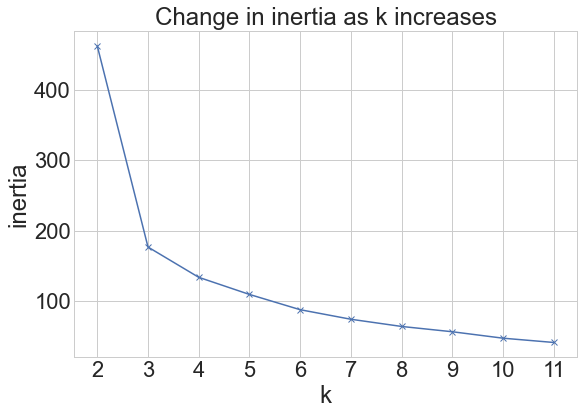

In [32]:
#Let's look at total points and egg cycles
X = X_train_scaled[['total_points', 'egg_cycles']]
inertia(X)

Clusters based on total_points and egg_cycles of Pokemon


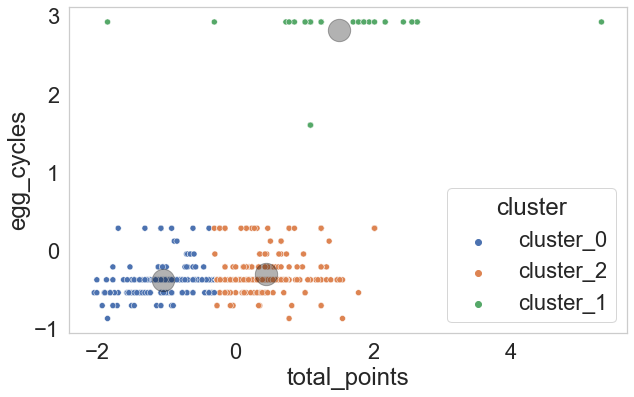

In [33]:
make_cluster(X_train_scaled, X, 3, 'total_points','egg_cycles')

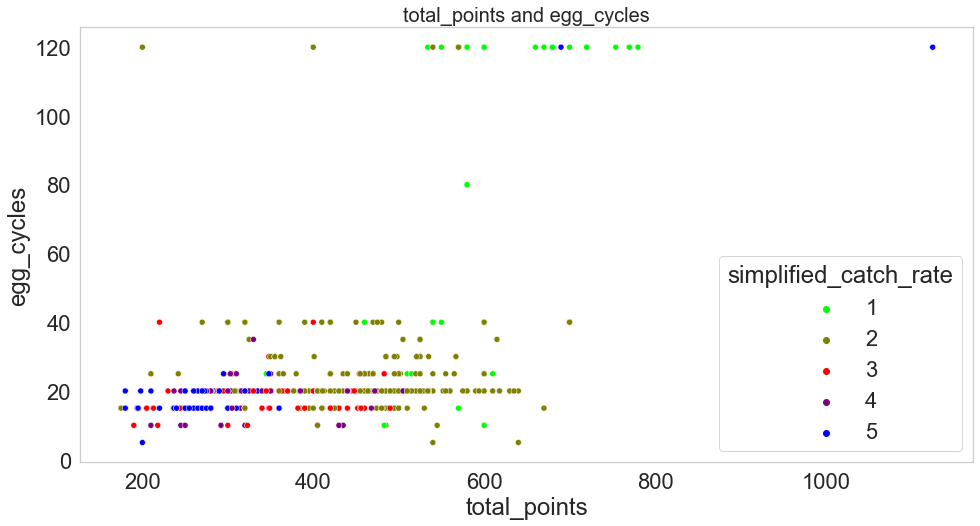

In [34]:
scatterplot(train, 'total_points','egg_cycles')

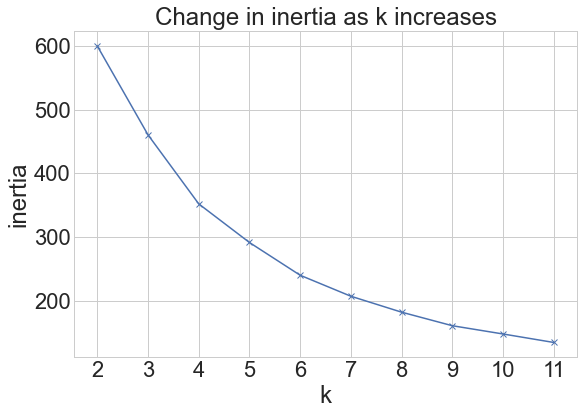

In [35]:
X = X_train_scaled[['defense', 'attack']]
inertia(X)

Clusters based on defense and attack of Pokemon


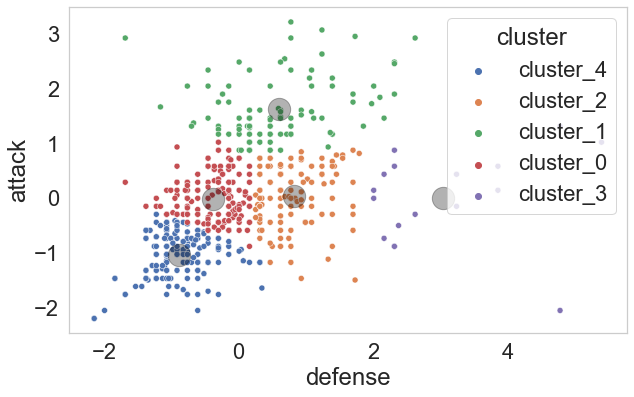

In [36]:
make_cluster(X_train_scaled, X, 5, 'defense','attack')

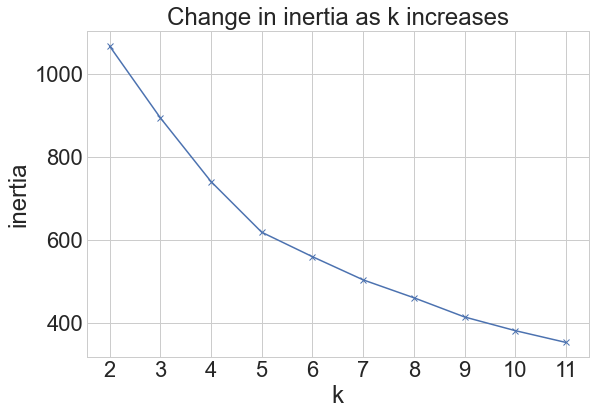

In [37]:
X = X_train_scaled[['defense', 'attack','hp']]
inertia(X)

In [38]:
#choosing 5 
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

#make column called cluster_house_basics
X_train_scaled['poke_stats'] = kmeans.predict(X)

#centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

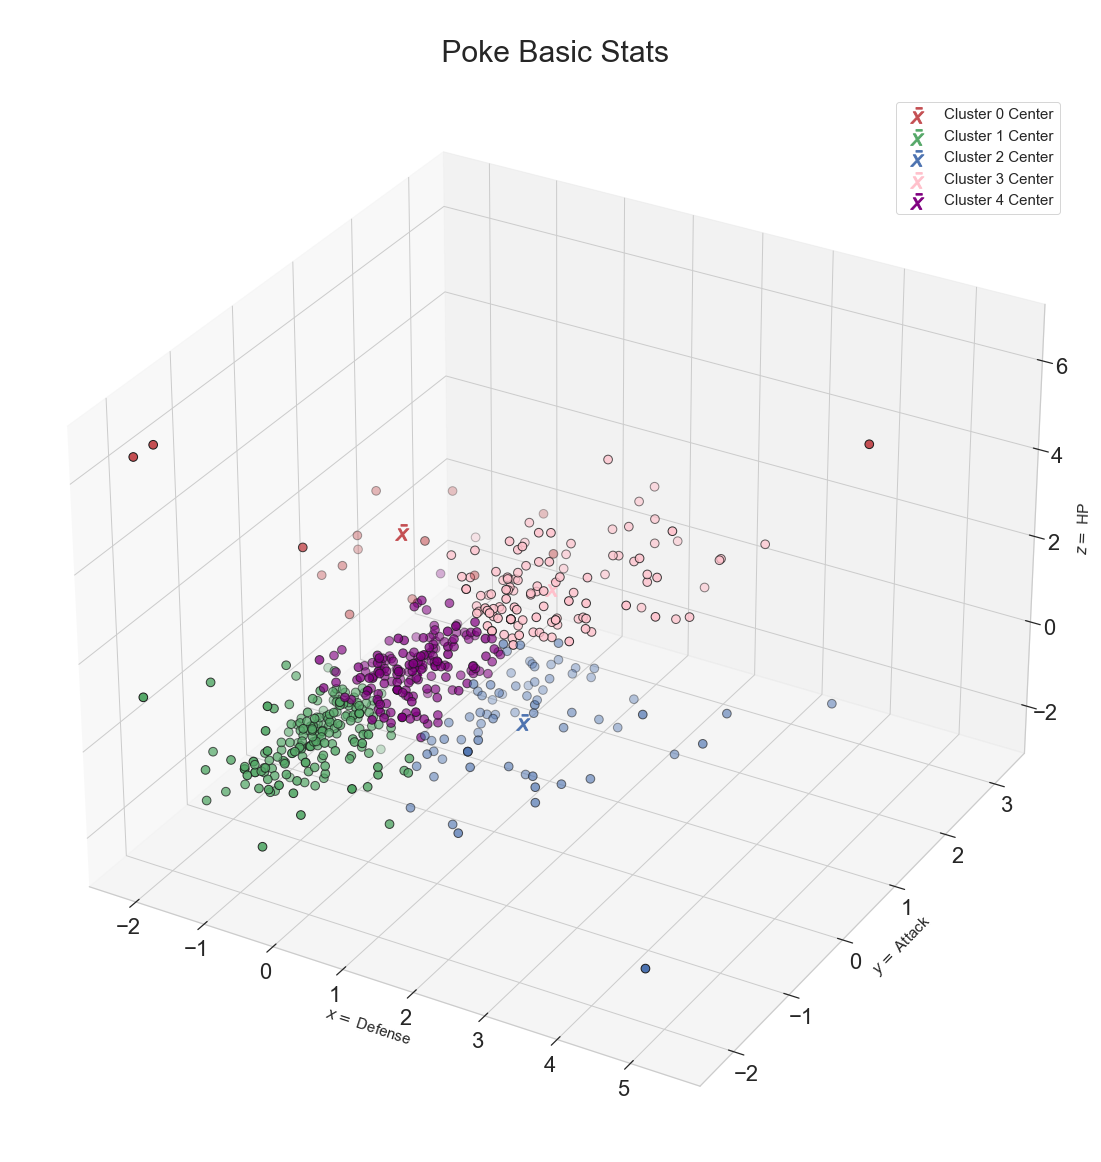

In [39]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# set x for each cluster
x0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['defense']
x1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['defense']
x2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['defense']
x3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['defense']
x4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['defense']


# set y for each cluster
y0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['attack']
y1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['attack']
y2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['attack']
y3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['attack']
y4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['attack']

# set z for each cluster
z0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['hp']
z1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['hp']
z2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['hp']
z3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['hp']
z4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['hp']

#centroids
zero_center = centroids[centroids.index == 0]
one_center = centroids[centroids.index == 1]
two_center = centroids[centroids.index == 2]
three_center = centroids[centroids.index == 3]
four_center = centroids[centroids.index == 4]

# plot cluster 0 with center
ax.scatter(x0, y0, z0, s=75, c='r', edgecolor='k', marker='o')
ax.scatter(zero_center.defense, zero_center.attack, zero_center.hp, s=250, c='r', marker='$\\bar{x}$', label='Cluster 0 Center')
# plot cluster 1 with center
ax.scatter(x1, y1, z1, s=75, c='g', edgecolor='k', marker='o')
ax.scatter(one_center.defense, one_center.attack, one_center.hp, s=250, c='g', marker='$\\bar{x}$', label='Cluster 1 Center')
# plot cluster 2 with center
ax.scatter(x2, y2, z2, s=75, c='b', edgecolor='k', marker='o')
ax.scatter(two_center.defense, two_center.attack, two_center.hp, s=250, c='b', marker='$\\bar{x}$', label='Cluster 2 Center')
#plot cluster 3 with center
ax.scatter(x3, y3, z3, s=75, c='pink', edgecolor='k', marker='o')
ax.scatter(three_center.defense, three_center.attack, three_center.hp, s=250, c='pink', marker='$\\bar{x}$', label='Cluster 3 Center')
#plot cluster 4 with center
ax.scatter(x4, y4, z4, s=75, c='purple', edgecolor='k', marker='o')
ax.scatter(four_center.defense, four_center.attack, four_center.hp, s=250, c='purple', marker='$\\bar{x}$', label='Cluster 4 Center')
# set labels and title
ax.set_xlabel('\n$x =$ Defense', fontsize=15)
ax.set_ylabel('\n$y =$ Attack', fontsize=15)
ax.set_zlabel('\n$z =$ HP', fontsize=15)
plt.title('\n Poke Basic Stats', fontsize=30)
plt.legend(bbox_to_anchor=(0.975,0.975), fontsize=15)
plt.show()

In [40]:
#X_train_scaled.drop(columns=['cluster','poke_stats'])

In [41]:
# train['poke_stats'] = kmeans.predict(X)
# train

# Premature Modeling 

In [42]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    X_train, y_train = train[x_col], train[y_col]

    X_validate, y_validate = validate[x_col], validate[y_col]

    X_test, y_test = test[x_col], validate[y_col]
    
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [43]:
x_col = ['total_points', 'sp_attack','base_experience', 'sp_defense', 'percentage_male','status_num', 'egg_cycles', 'hp','defense','attack']
y_col = 'simplified_catch_rate'

In [44]:
# x_col = ['height_m', 'total_points', 'hp', 'percentage_male', 'against_rock', 'against_ghost', 'is_genderless']
# y_col = 'simplified_catch_rate'

In [45]:
#using only our features
X_train, y_train = train[x_col], train[y_col]

X_validate, y_validate = validate[x_col], validate[y_col]

X_test, y_test = test[x_col], test[y_col]

In [46]:
#since the most common value is 2 (the hard category) that will be our baseline
y_train.value_counts()

2    300
3     84
4     70
1     67
5     64
Name: simplified_catch_rate, dtype: int64

In [47]:
train['baseline_prediction'] = 2
round(accuracy_score(train.simplified_catch_rate, train.baseline_prediction),2)

0.51

In [48]:
baseline_score = round(accuracy_score(train.simplified_catch_rate, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.51


### Decision Tree

In [49]:
tree = DecisionTreeClassifier(max_leaf_nodes=12, max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=12)

In [50]:
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 73.85%
validate score: 70.92%


In [51]:
y_pred = tree.predict(X_train)

In [52]:
get_metrics_binary(tree)


    The accuracy for our model is 0.7385
    The True Positive Rate is 0.877, The False Positive Rate is 0.254,
    The True Negative Rate is 0.731, and the False Negative Rate is 0.0133
    


,precision,recall,f1-score,support
1,0.890909,0.731343,0.803279,67.000000
2,0.837580,0.876667,0.856678,300.000000
3,0.508929,0.678571,0.581633,84.000000
4,0.544118,0.528571,0.536232,70.000000
5,0.722222,0.406250,0.520000,64.000000
accuracy,0.738462,0.738462,0.738462,0.738462
macro avg,0.700751,0.644281,0.659564,585.000000
weighted avg,0.748761,0.738462,0.735891,585.000000


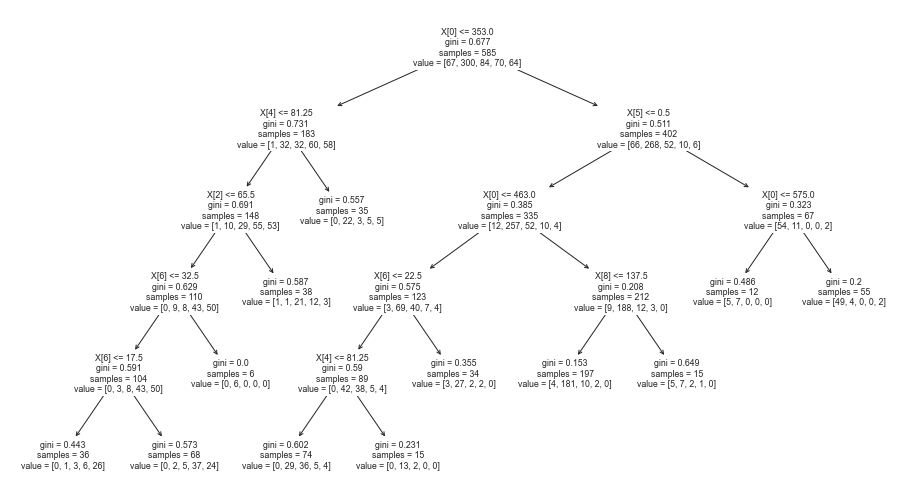

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        67
           2       0.84      0.88      0.86       300
           3       0.51      0.68      0.58        84
           4       0.54      0.53      0.54        70
           5       0.72      0.41      0.52        64

    accuracy                           0.74       585
   macro avg       0.70      0.64      0.66       585
weighted avg       0.75      0.74      0.74       585



In [53]:
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

print(classification_report(y_train, y_pred))

In [54]:
tree_precision = round(sklearn.metrics.precision_score(y_train, y_pred, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, y_pred, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {tree_precision}')
print(f'recall score is {tree_recall}')

Scores for Decision Tree!
---------------------------
Baseline score is 0.51
accuracy score is 0.74
precision score is 0.7
recall score is 0.64


### Random Forest

In [187]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [188]:
y_pred = rf.predict(X_train)

In [189]:
y_pred_proba = rf.predict_proba(X_train)

In [190]:
print(f'training score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

training score: 73.16%
validate score: 70.12%


In [191]:
get_metrics_binary(rf)


    The accuracy for our model is 0.7316
    The True Positive Rate is 0.947, The False Positive Rate is 0.194,
    The True Negative Rate is 0.791, and the False Negative Rate is 0.02
    


,precision,recall,f1-score,support
1,0.868852,0.791045,0.828125,67.000000
2,0.765499,0.946667,0.846498,300.000000
3,0.733333,0.130952,0.222222,84.000000
4,0.555556,0.571429,0.563380,70.000000
5,0.606061,0.625000,0.615385,64.000000
accuracy,0.731624,0.731624,0.731624,0.731624
macro avg,0.705860,0.613018,0.615122,585.000000
weighted avg,0.730153,0.731624,0.695592,585.000000


In [192]:
print('Scores for Random Forest!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0,average="macro"),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0, average="macro"),2)}')

Scores for Random Forest!
---------------------------
Baseline score is 0.51
accuracy score is 0.73
precision score is 0.71
recall score is 0.61


<br>

### Logistic Regression

In [55]:
logit = LogisticRegression(C= 10, random_state =123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(f'training score: {logit.score(X_train, y_train):.2%}')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')

training score: 57.09%
validate score: 54.58%


In [56]:
get_metrics_binary(logit)


    The accuracy for our model is 0.5709
    The True Positive Rate is 0.943, The False Positive Rate is 0.269,
    The True Negative Rate is 0.687, and the False Negative Rate is 0.04
    


,precision,recall,f1-score,support
1,0.793103,0.686567,0.736000,67.00000
2,0.558185,0.943333,0.701363,300.00000
3,0.000000,0.000000,0.000000,84.00000
4,0.250000,0.014286,0.027027,70.00000
5,0.307692,0.062500,0.103896,64.00000
accuracy,0.570940,0.570940,0.570940,0.57094
macro avg,0.381796,0.341337,0.313657,585.00000
weighted avg,0.440660,0.570940,0.458568,585.00000


In [57]:
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0,average="macro"),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0, average="macro"),2)}')

Scores for Logistic Regression!
---------------------------
Baseline score is 0.51
accuracy score is 0.57
precision score is 0.38
recall score is 0.34


<br>

### KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

training score: 74.19%
validate score: 70.52%


In [59]:
get_metrics_binary(knn)


    The accuracy for our model is 0.7419
    The True Positive Rate is 0.917, The False Positive Rate is 0.209,
    The True Negative Rate is 0.776, and the False Negative Rate is 0.03
    


,precision,recall,f1-score,support
1,0.825397,0.776119,0.800000,67.00000
2,0.806452,0.916667,0.858034,300.00000
3,0.688889,0.369048,0.480620,84.00000
4,0.550000,0.628571,0.586667,70.00000
5,0.571429,0.500000,0.533333,64.00000
accuracy,0.741880,0.741880,0.741880,0.74188
macro avg,0.688433,0.638081,0.651731,585.00000
weighted avg,0.735342,0.741880,0.729201,585.00000


In [60]:
print('Scores for KNN!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0, average="macro"),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0, average="macro"),2)}')

Scores for KNN!
---------------------------
Baseline score is 0.51
accuracy score is 0.74
precision score is 0.69
recall score is 0.64


### Test

In [61]:
actual_test = y_test
predicted_test = knn.predict(X_test)
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           1       0.76      0.79      0.78        24
           2       0.77      0.92      0.83       107
           3       0.64      0.23      0.34        30
           4       0.50      0.52      0.51        25
           5       0.58      0.48      0.52        23

    accuracy                           0.71       209
   macro avg       0.65      0.59      0.60       209
weighted avg       0.69      0.71      0.68       209



In [62]:
print(f'Baseline score is {baseline_score*100}%')
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
print(f'test score: {knn.score(X_test, y_test):.2%}')

Baseline score is 51.0%
training score: 74.19%
validate score: 70.52%
test score: 70.81%


In [63]:
actual_test = y_test
predicted_test = tree.predict(X_test)
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        24
           2       0.83      0.90      0.86       107
           3       0.45      0.63      0.53        30
           4       0.37      0.28      0.32        25
           5       0.75      0.39      0.51        23

    accuracy                           0.71       209
   macro avg       0.66      0.59      0.61       209
weighted avg       0.72      0.71      0.71       209



In [64]:
print(f'Baseline score is {baseline_score*100}%')
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')
print(f'test score: {tree.score(X_test, y_test):.2%}')

Baseline score is 51.0%
training score: 73.85%
validate score: 70.92%
test score: 71.29%


In [65]:
proba_test = tree.predict_proba(X_test)

In [66]:
proba_df = pd.DataFrame(proba_test, columns=tree.classes_.tolist())
proba_df.head()

,1,2,3,4,5
0,0.000000,0.029412,0.073529,0.544118,0.352941
1,0.890909,0.072727,0.000000,0.000000,0.036364
2,0.890909,0.072727,0.000000,0.000000,0.036364
3,0.000000,0.391892,0.486486,0.067568,0.054054
4,0.020305,0.918782,0.050761,0.010152,0.000000


In [67]:
reset_test = test.reset_index()

In [68]:
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,index,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,...,status_num,primary_num,secondary_num,growth_num,simplified_catch_rate,1,2,3,4,5
0,416,349,Feebas,3,Normal,Fish Pokémon,1,Water,None,0.6,...,0.0,0.0,0.0,4.0,5,0.000000,0.029412,0.073529,0.544118,0.352941
1,760,648,Meloetta Pirouette Forme,5,Mythical,Melody Pokémon,2,Normal,Fighting,0.6,...,3.0,1.0,8.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364
2,925,792,Lunala,7,Legendary,Moone Pokémon,2,Psychic,Ghost,4.0,...,2.0,4.0,11.0,1.0,2,0.890909,0.072727,0.000000,0.000000,0.036364
3,238,192,Sunflora,2,Normal,Sun Pokémon,1,Grass,None,0.8,...,0.0,2.0,0.0,2.0,3,0.000000,0.391892,0.486486,0.067568,0.054054
4,663,560,Scrafty,5,Normal,Hoodlum Pokémon,2,Dark,Fighting,1.1,...,0.0,8.0,8.0,0.0,3,0.020305,0.918782,0.050761,0.010152,0.000000


In [69]:
test_proba_df['predicted'] = predicted_test
test_proba_df.head()

,index,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,...,primary_num,secondary_num,growth_num,simplified_catch_rate,1,2,3,4,5,predicted
0,416,349,Feebas,3,Normal,Fish Pokémon,1,Water,None,0.6,...,0.0,0.0,4.0,5,0.000000,0.029412,0.073529,0.544118,0.352941,4
1,760,648,Meloetta Pirouette Forme,5,Mythical,Melody Pokémon,2,Normal,Fighting,0.6,...,1.0,8.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
2,925,792,Lunala,7,Legendary,Moone Pokémon,2,Psychic,Ghost,4.0,...,4.0,11.0,1.0,2,0.890909,0.072727,0.000000,0.000000,0.036364,1
3,238,192,Sunflora,2,Normal,Sun Pokémon,1,Grass,None,0.8,...,2.0,0.0,2.0,3,0.000000,0.391892,0.486486,0.067568,0.054054,3
4,663,560,Scrafty,5,Normal,Hoodlum Pokémon,2,Dark,Fighting,1.1,...,8.0,8.0,0.0,3,0.020305,0.918782,0.050761,0.010152,0.000000,2


In [70]:
test_proba_df.to_csv('pokedex_simcatch_predictions.csv')

In [83]:
test_proba_df.loc[test_proba_df.status =='Mythical']

,index,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,...,primary_num,secondary_num,growth_num,simplified_catch_rate,1,2,3,4,5,predicted
1,760,648,Meloetta Pirouette Forme,5,Mythical,Melody Pokémon,2,Normal,Fighting,0.6,...,1.0,8.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
7,590,493,Arceus,4,Mythical,Alpha Pokémon,1,Normal,None,3.2,...,1.0,0.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
78,943,807,Zeraora,7,Mythical,Thunderclap Pokémon,1,Electric,None,1.5,...,6.0,0.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
92,944,808,Meltan,7,Mythical,Hex Nut Pokémon,1,Steel,None,0.2,...,15.0,0.0,1.0,1,0.000000,0.628571,0.085714,0.142857,0.142857,2
99,758,647,Keldeo Resolute Forme,5,Mythical,Colt Pokémon,2,Water,Fighting,1.4,...,0.0,8.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
152,589,492,Shaymin Sky Forme,4,Mythical,Gratitude Pokémon,2,Grass,Flying,0.4,...,2.0,1.0,2.0,2,0.890909,0.072727,0.000000,0.000000,0.036364,1
176,843,719,Mega Diancie,6,Mythical,Jewel Pokémon,2,Rock,Fairy,1.1,...,7.0,2.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1


In [73]:
incorrects =test_proba_df.loc[test_proba_df.simplified_catch_rate != test_proba_df.predicted]

In [85]:
incorrects.loc[incorrects.status=='Legendary']

,index,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,...,primary_num,secondary_num,growth_num,simplified_catch_rate,1,2,3,4,5,predicted
2,925,792,Lunala,7,Legendary,Moone Pokémon,2,Psychic,Ghost,4.0,...,4.0,11.0,1.0,2,0.890909,0.072727,0.0,0.0,0.036364,1
150,840,718,Zygarde 10% Forme,6,Legendary,Order Pokémon,2,Dragon,Ground,1.2,...,13.0,4.0,1.0,1,0.416667,0.583333,0.0,0.0,0.000000,2


In [80]:
incorrects.shape

(60, 63)

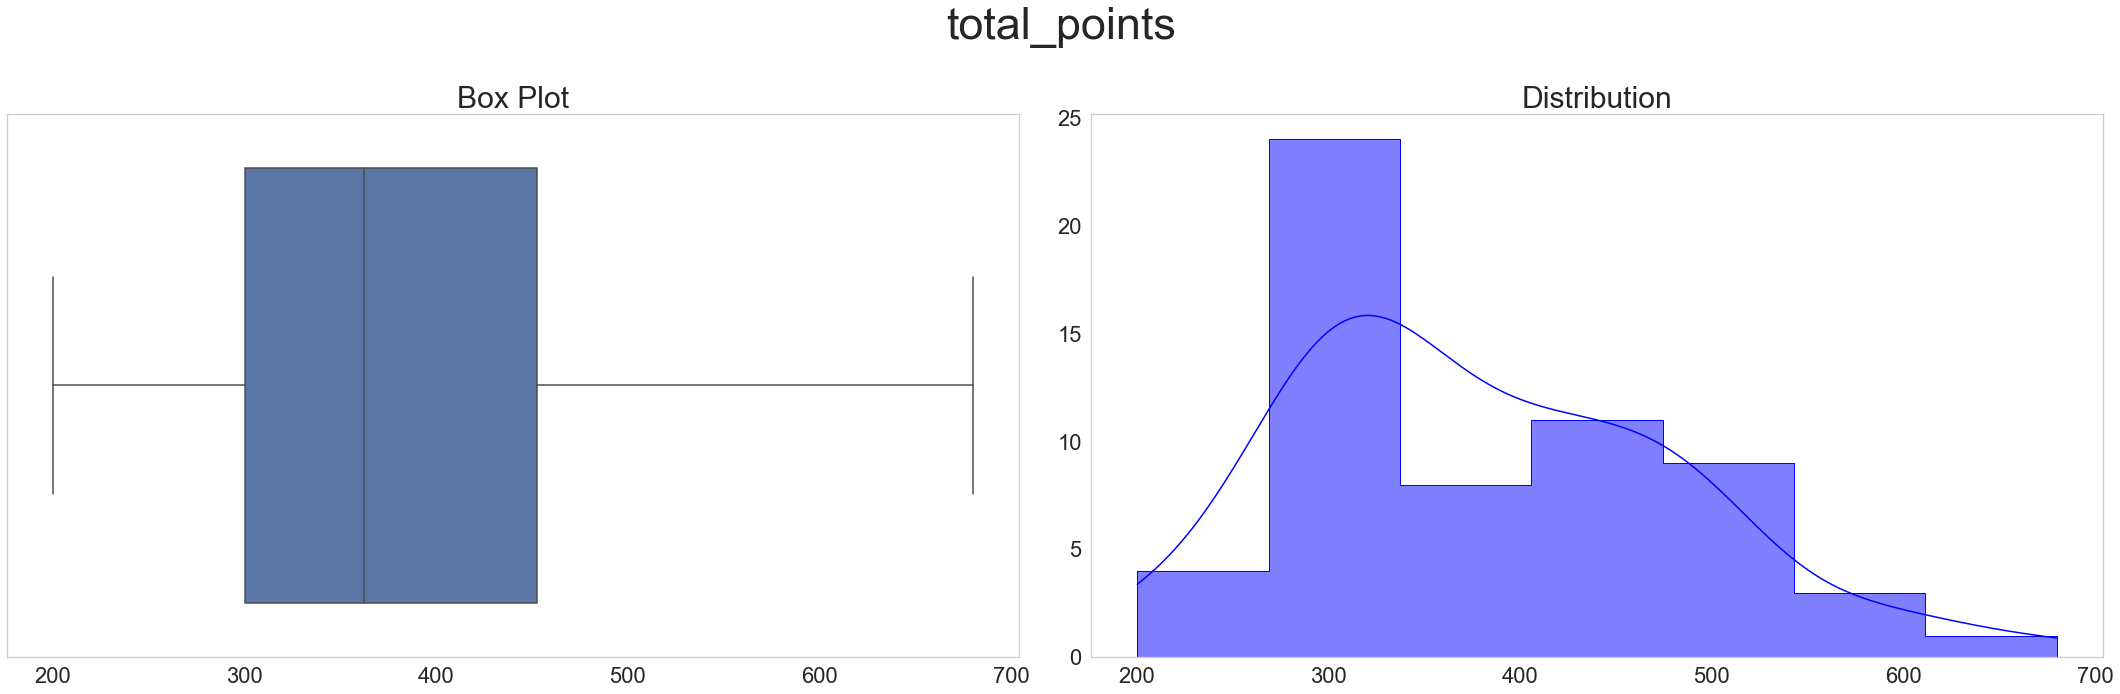

Summary Statistics for total_points
count     585.000000
mean      438.774359
std       129.332892
min       175.000000
25%       320.000000
50%       455.000000
75%       520.000000
max      1125.000000
Name: total_points, dtype: float64


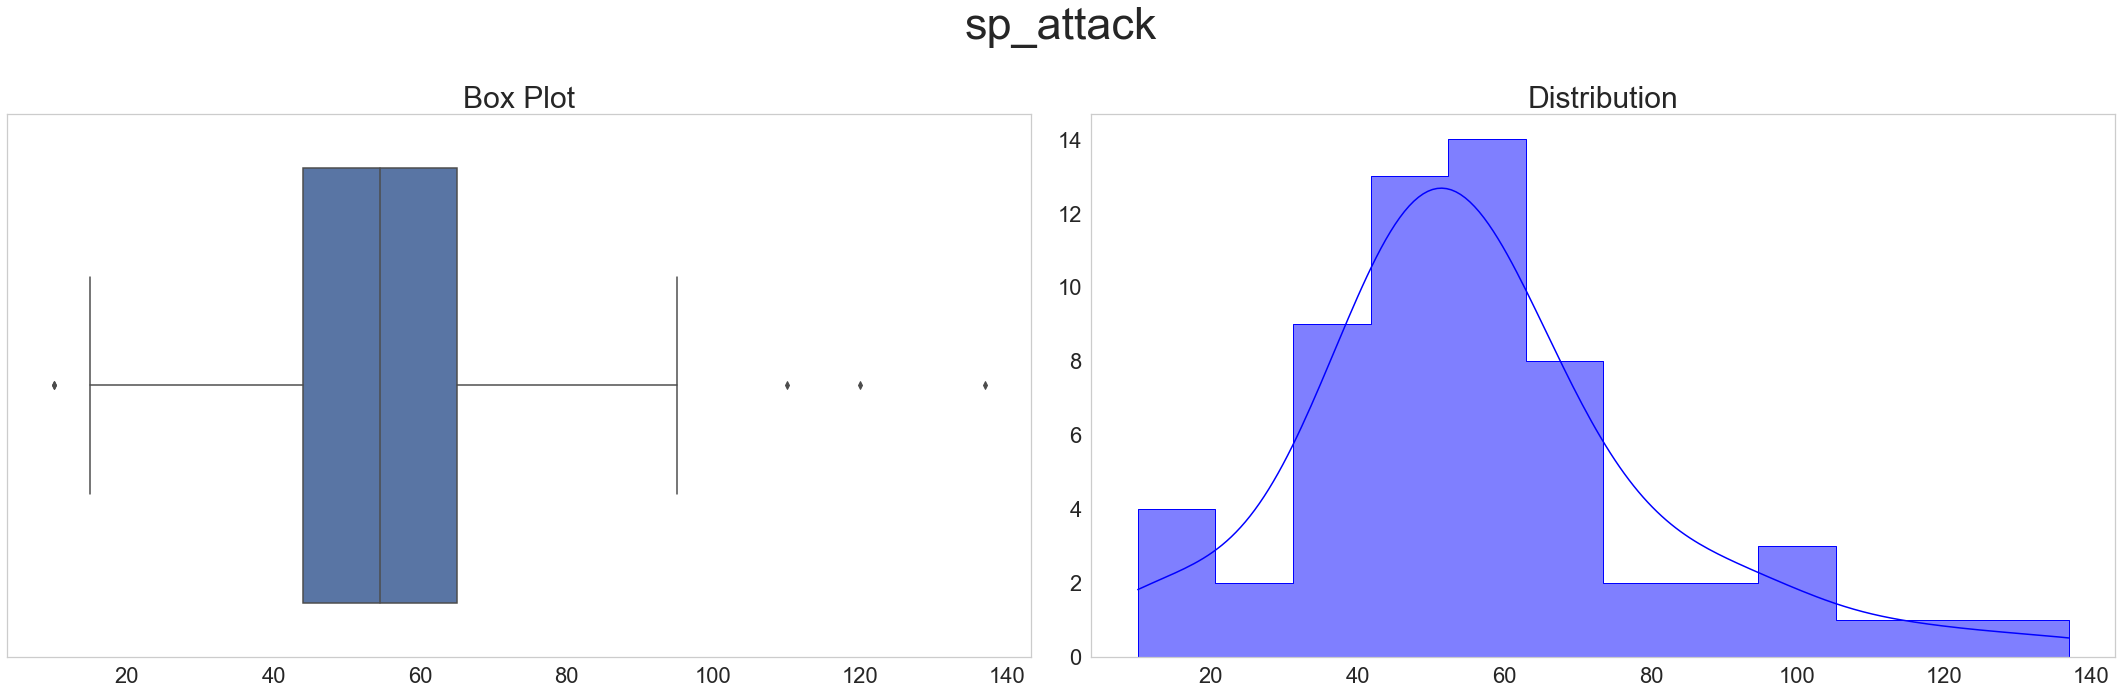

Summary Statistics for sp_attack
count    585.000000
mean      73.490598
std       33.751920
min       10.000000
25%       49.000000
50%       66.000000
75%       95.000000
max      194.000000
Name: sp_attack, dtype: float64


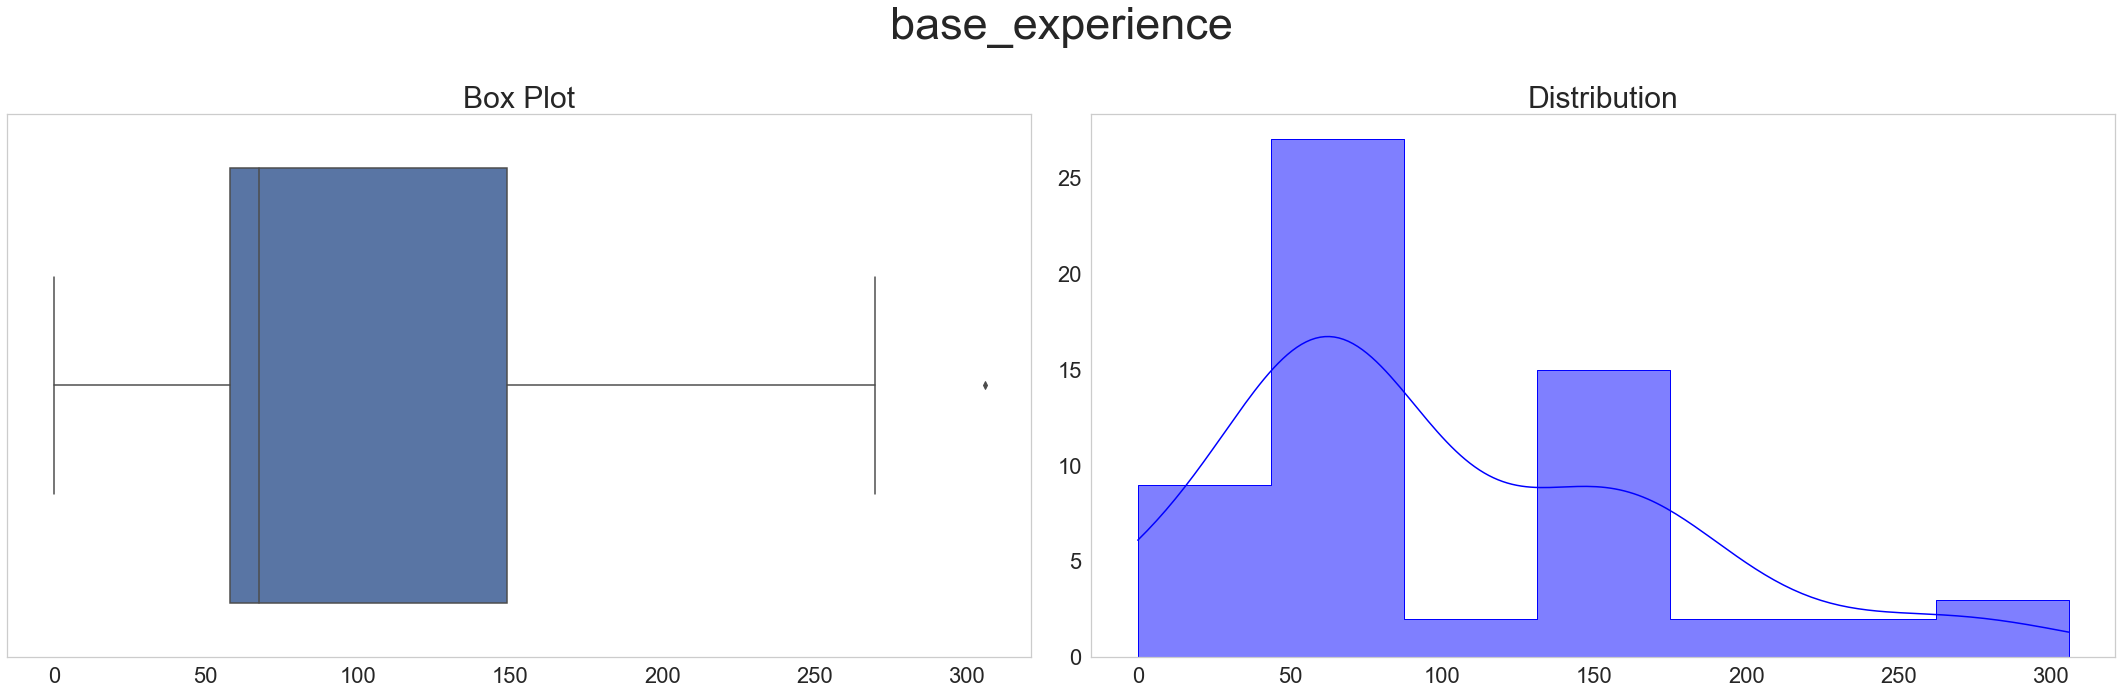

Summary Statistics for base_experience
count    585.000000
mean     137.270085
std       91.200830
min        0.000000
25%       61.000000
50%      144.000000
75%      184.000000
max      608.000000
Name: base_experience, dtype: float64


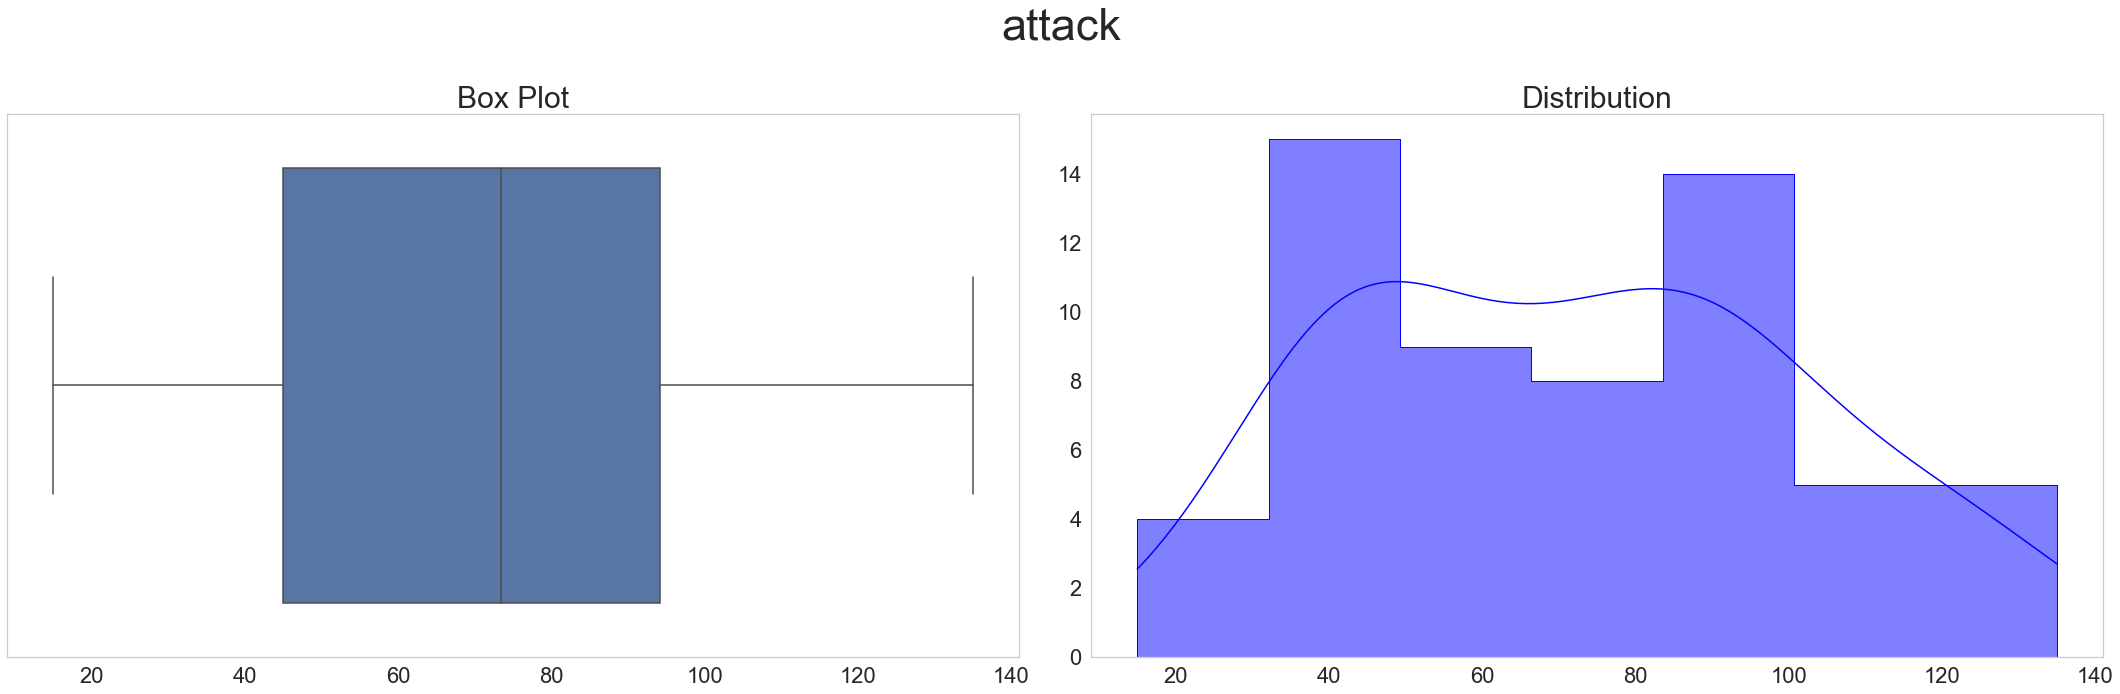

Summary Statistics for attack
count    585.000000
mean      79.993162
std       34.141426
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64


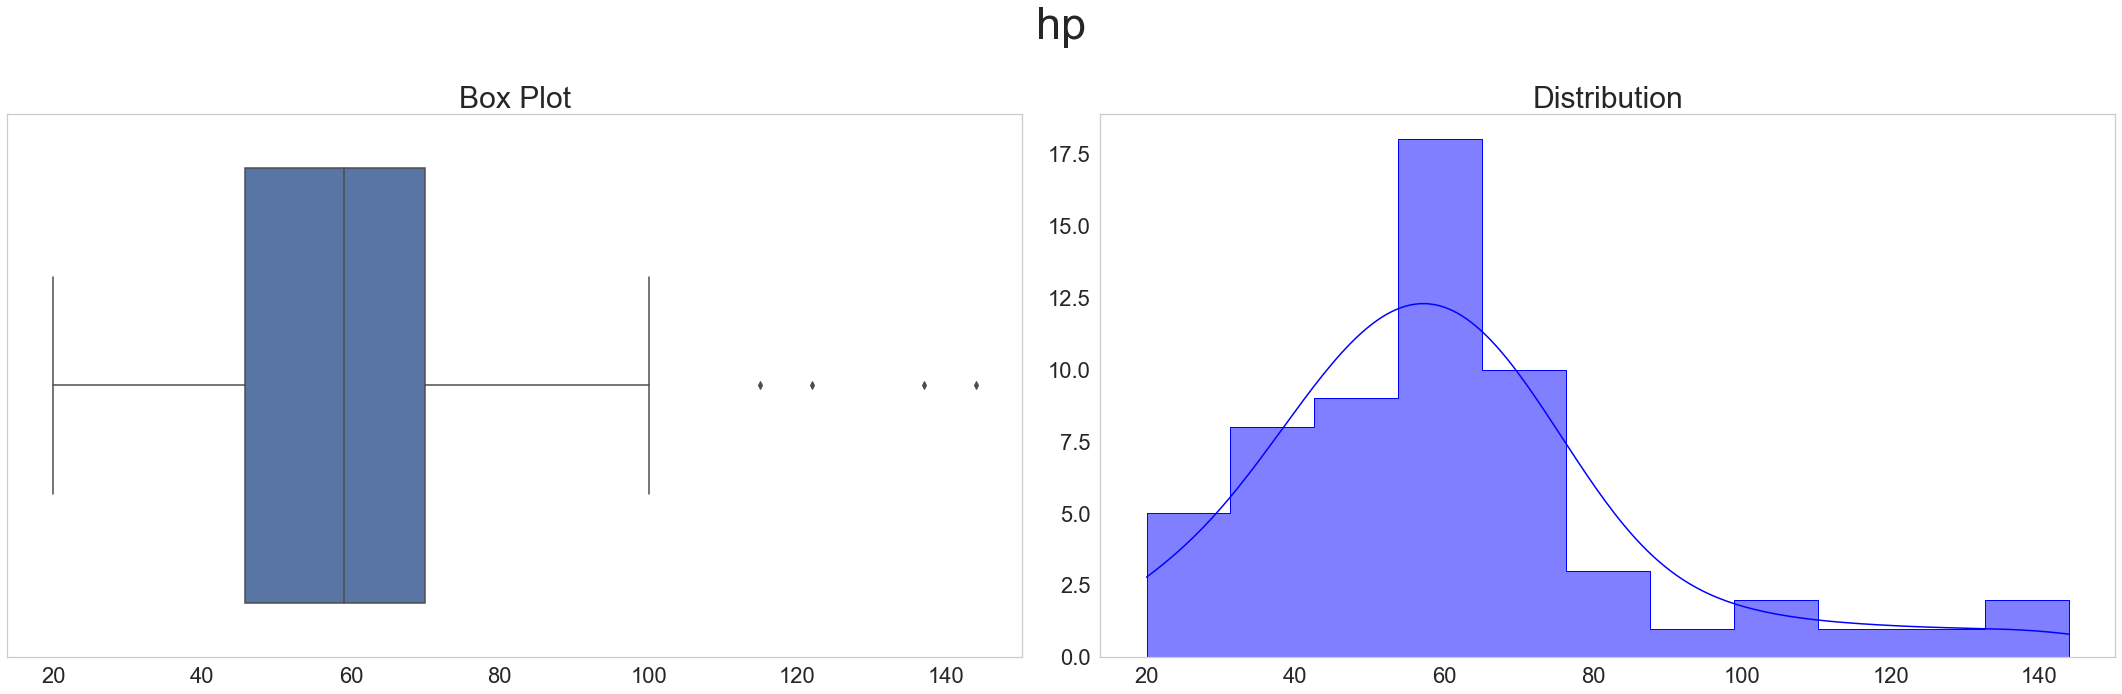

Summary Statistics for hp
count    585.000000
mean      70.234188
std       28.019896
min        1.000000
25%       50.000000
50%       67.000000
75%       85.000000
max      255.000000
Name: hp, dtype: float64


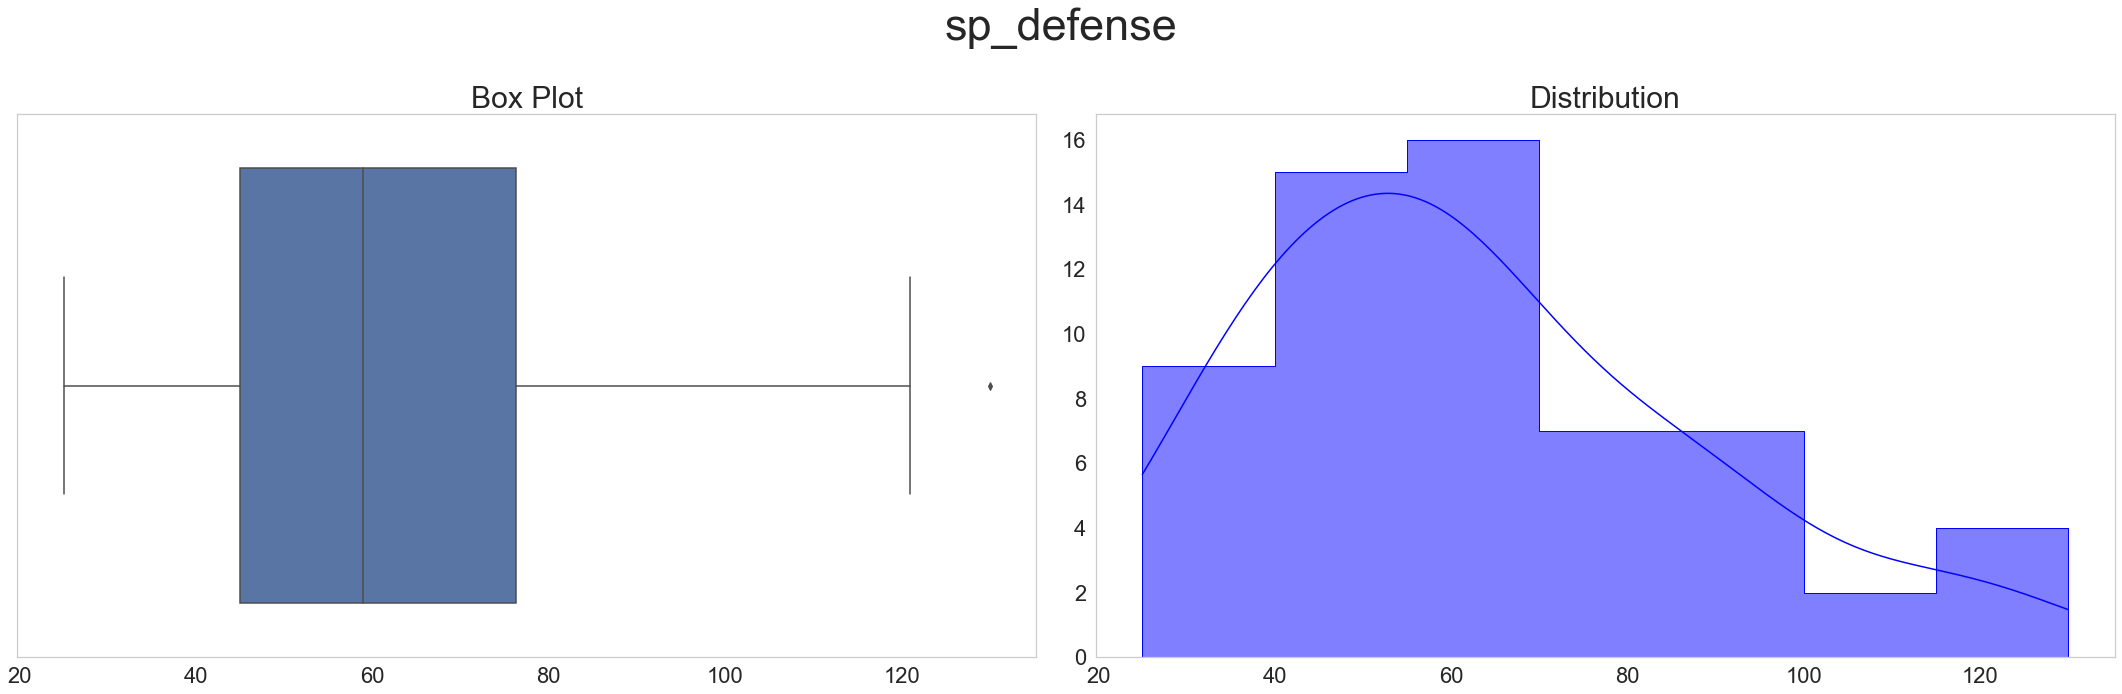

Summary Statistics for sp_defense
count    585.000000
mean      72.377778
std       29.505848
min       20.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      250.000000
Name: sp_defense, dtype: float64


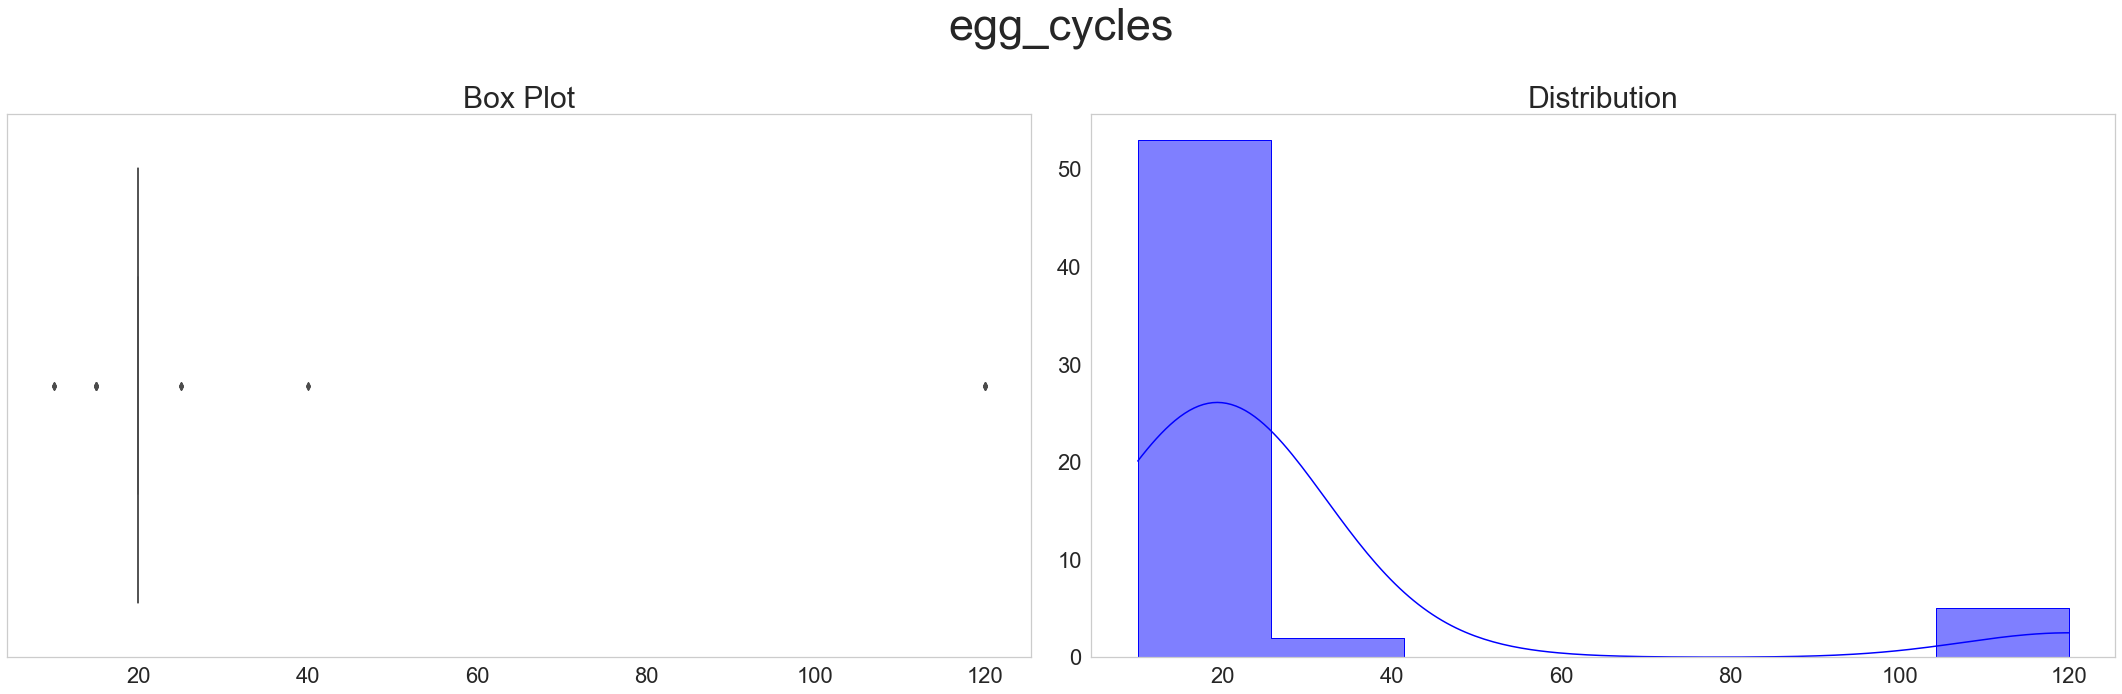

Summary Statistics for egg_cycles
count    585.000000
mean      31.256410
std       30.333521
min        5.000000
25%       20.000000
50%       20.000000
75%       25.000000
max      120.000000
Name: egg_cycles, dtype: float64


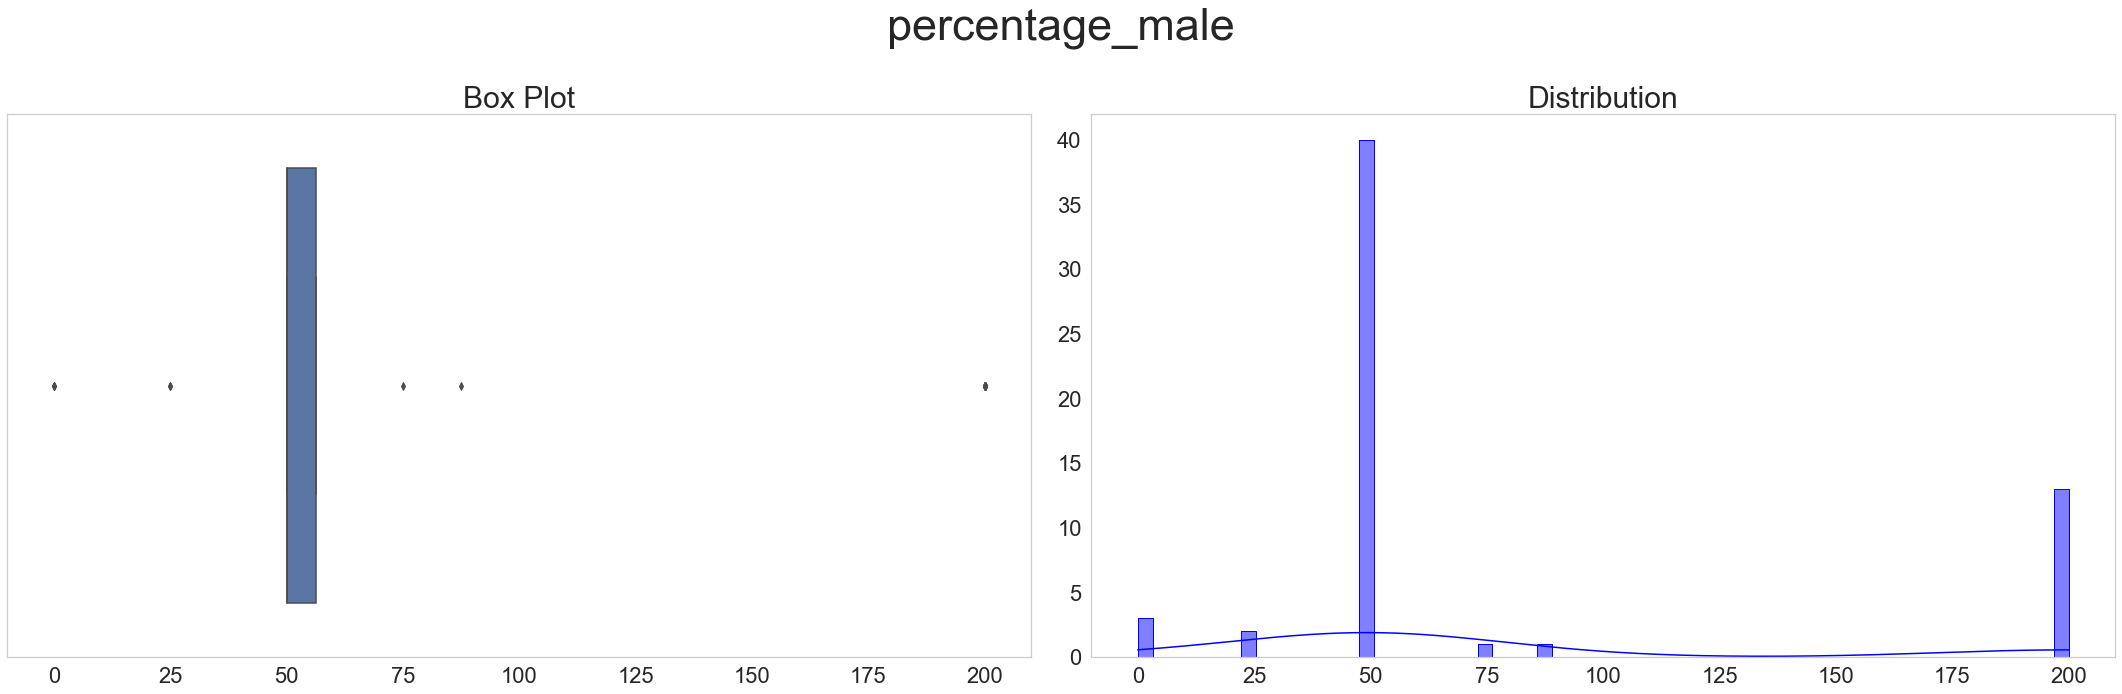

Summary Statistics for percentage_male
count    585.000000
mean      79.722222
std       57.630304
min        0.000000
25%       50.000000
50%       50.000000
75%       87.500000
max      200.000000
Name: percentage_male, dtype: float64


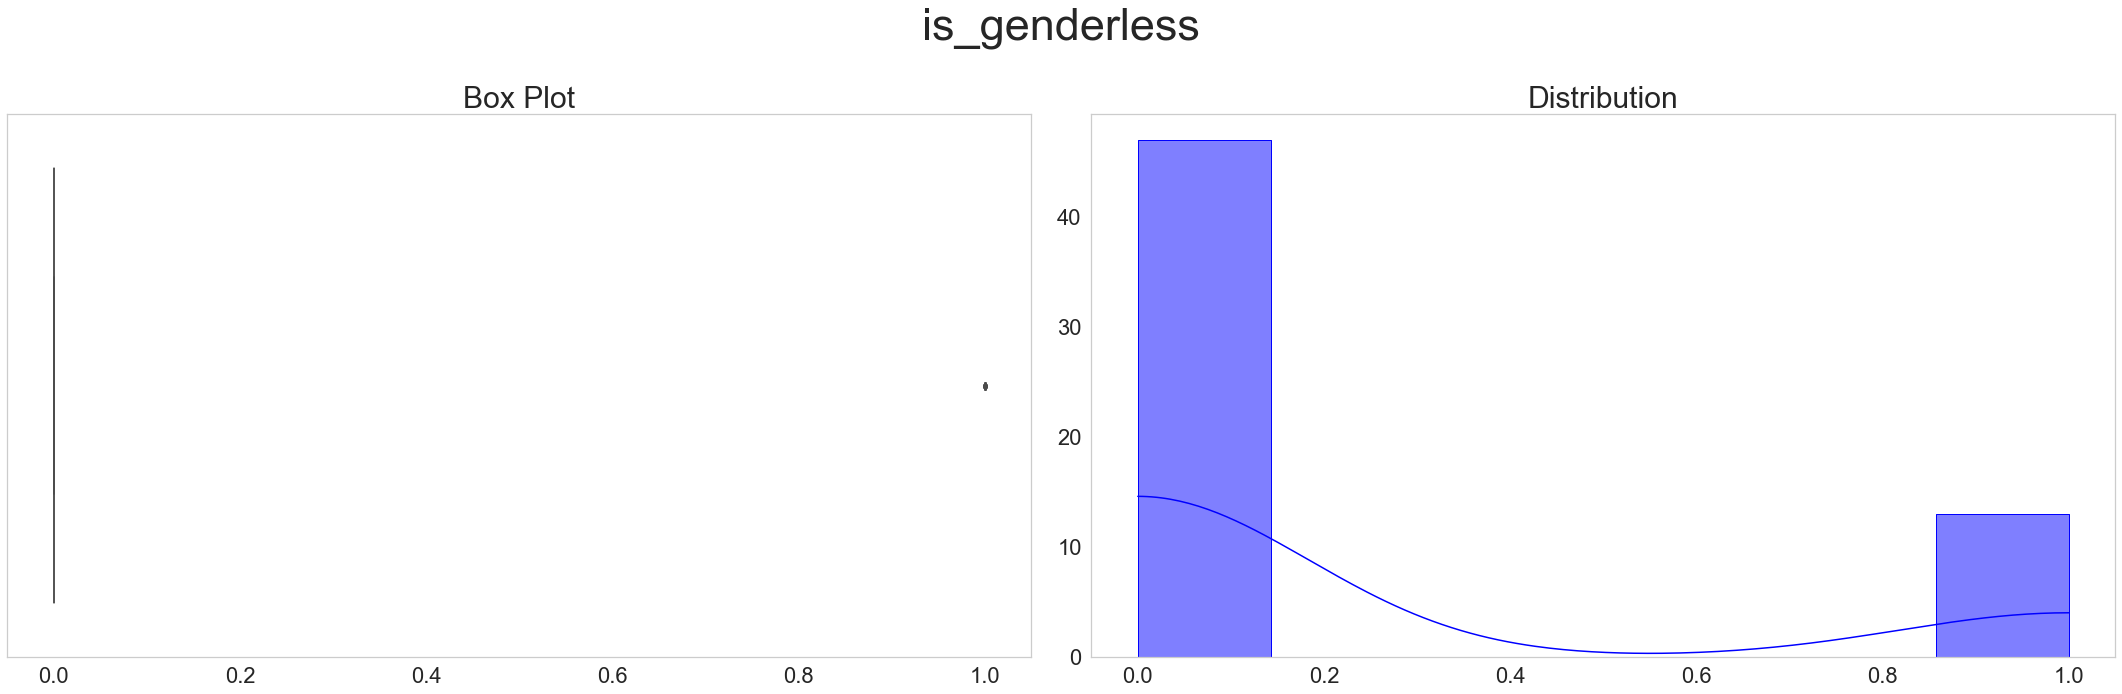

Summary Statistics for is_genderless
count    585.000000
mean       0.170940
std        0.376779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_genderless, dtype: float64


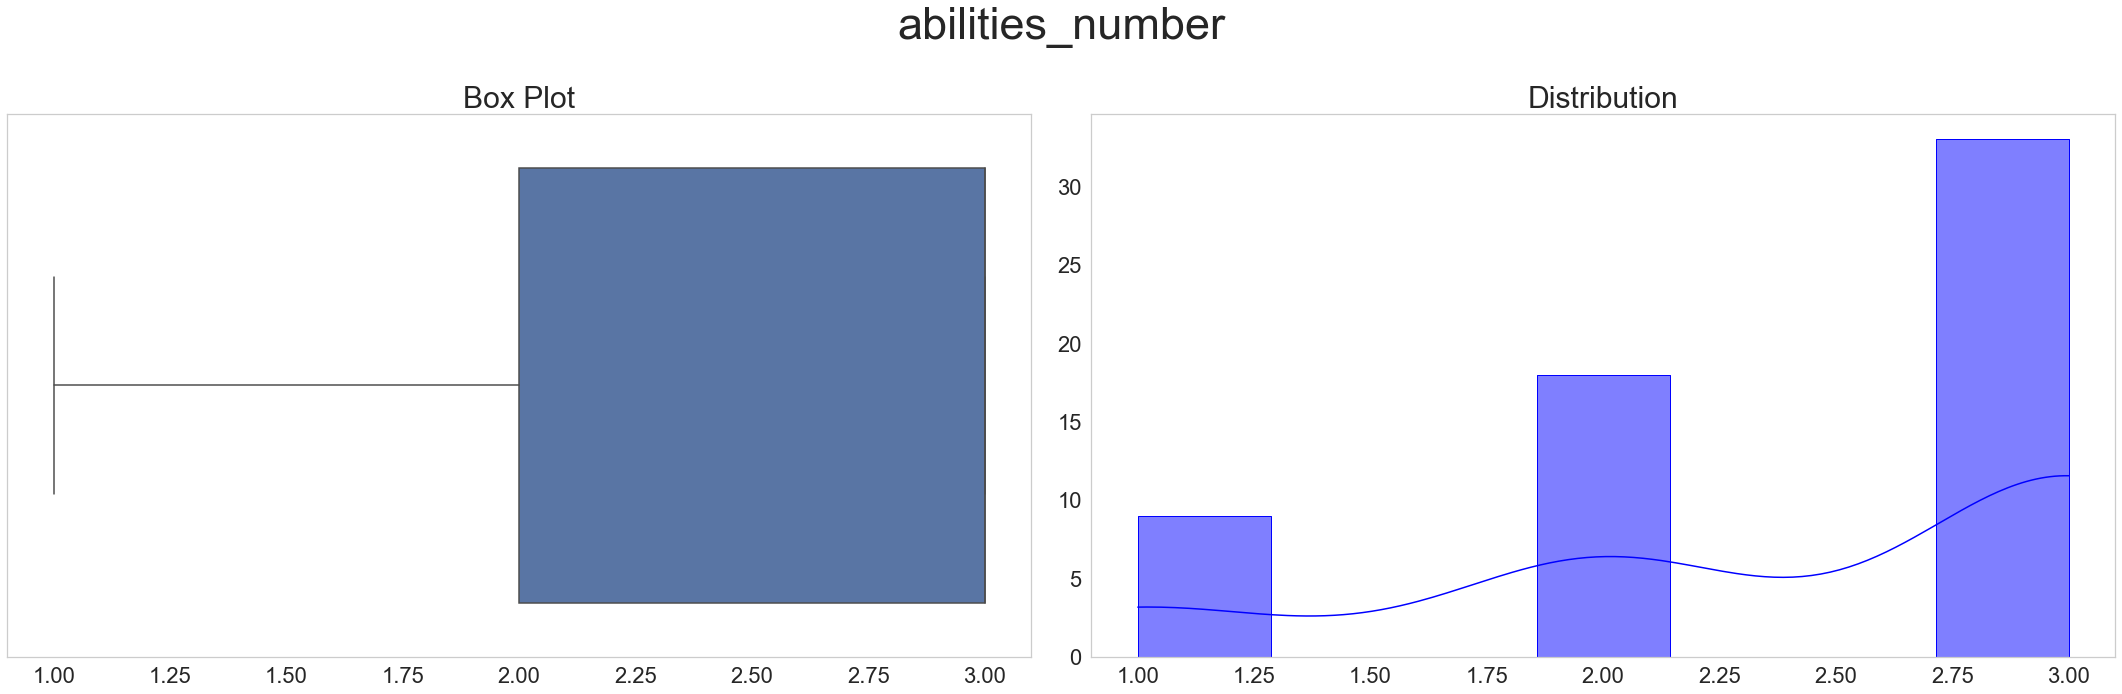

Summary Statistics for abilities_number
count    585.000000
mean       2.246154
std        0.817775
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: abilities_number, dtype: float64


In [86]:
for i in univariate_stuff:
    explore_univariate(incorrects, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

In [88]:
corrects =test_proba_df.loc[test_proba_df.simplified_catch_rate == test_proba_df.predicted]

In [89]:
corrects

,index,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,...,primary_num,secondary_num,growth_num,simplified_catch_rate,1,2,3,4,5,predicted
1,760,648,Meloetta Pirouette Forme,5,Mythical,Melody Pokémon,2,Normal,Fighting,0.6,...,1.0,8.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
3,238,192,Sunflora,2,Normal,Sun Pokémon,1,Grass,None,0.8,...,2.0,0.0,2.0,3,0.000000,0.391892,0.486486,0.067568,0.054054,3
5,858,733,Toucannon,7,Normal,Cannon Pokémon,2,Normal,Flying,1.1,...,1.0,1.0,0.0,2,0.020305,0.918782,0.050761,0.010152,0.000000,2
7,590,493,Arceus,4,Mythical,Alpha Pokémon,1,Normal,None,3.2,...,1.0,0.0,1.0,1,0.890909,0.072727,0.000000,0.000000,0.036364,1
10,368,306,Mega Aggron,3,Normal,Iron Armor Pokémon,1,Steel,None,2.2,...,15.0,0.0,1.0,2,0.333333,0.466667,0.133333,0.066667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,210,165,Ledyba,2,Normal,Five Star Pokémon,2,Bug,Flying,1.0,...,3.0,1.0,3.0,5,0.000000,0.027778,0.083333,0.166667,0.722222,5
202,321,264,Linoone,3,Normal,Rushing Pokémon,1,Normal,None,0.5,...,1.0,0.0,0.0,3,0.000000,0.391892,0.486486,0.067568,0.054054,3
206,157,122,Mr. Mime,1,Normal,Barrier Pokémon,2,Psychic,Fairy,1.3,...,4.0,2.0,0.0,2,0.088235,0.794118,0.058824,0.058824,0.000000,2
207,140,107,Hitmonchan,1,Normal,Punching Pokémon,1,Fighting,None,1.4,...,9.0,0.0,0.0,2,0.088235,0.794118,0.058824,0.058824,0.000000,2


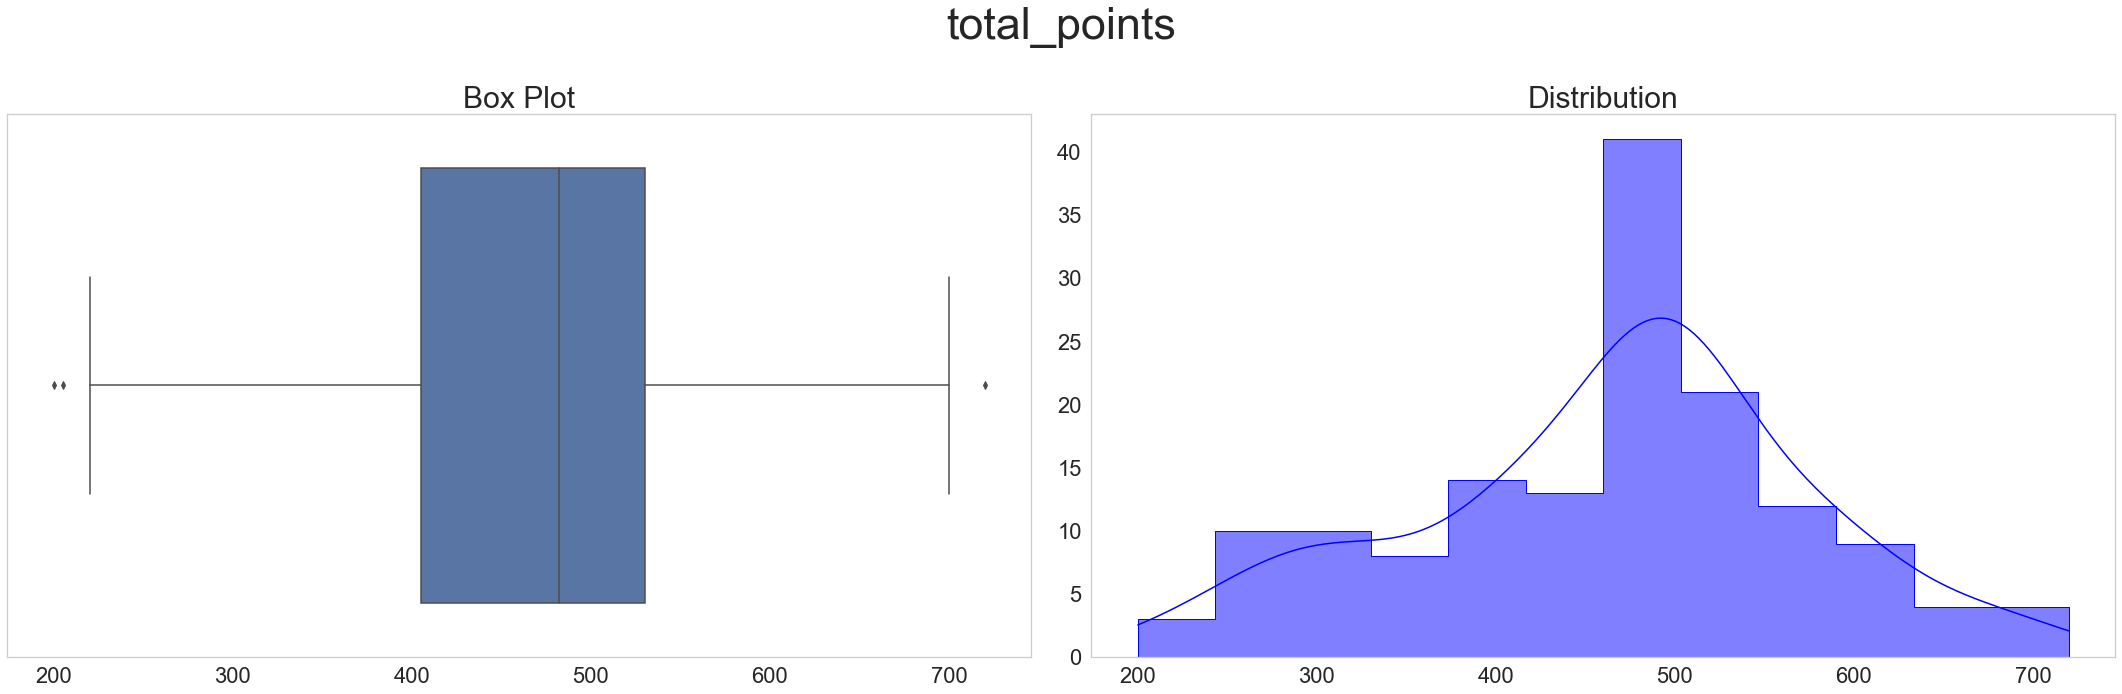

Summary Statistics for total_points
count     585.000000
mean      438.774359
std       129.332892
min       175.000000
25%       320.000000
50%       455.000000
75%       520.000000
max      1125.000000
Name: total_points, dtype: float64


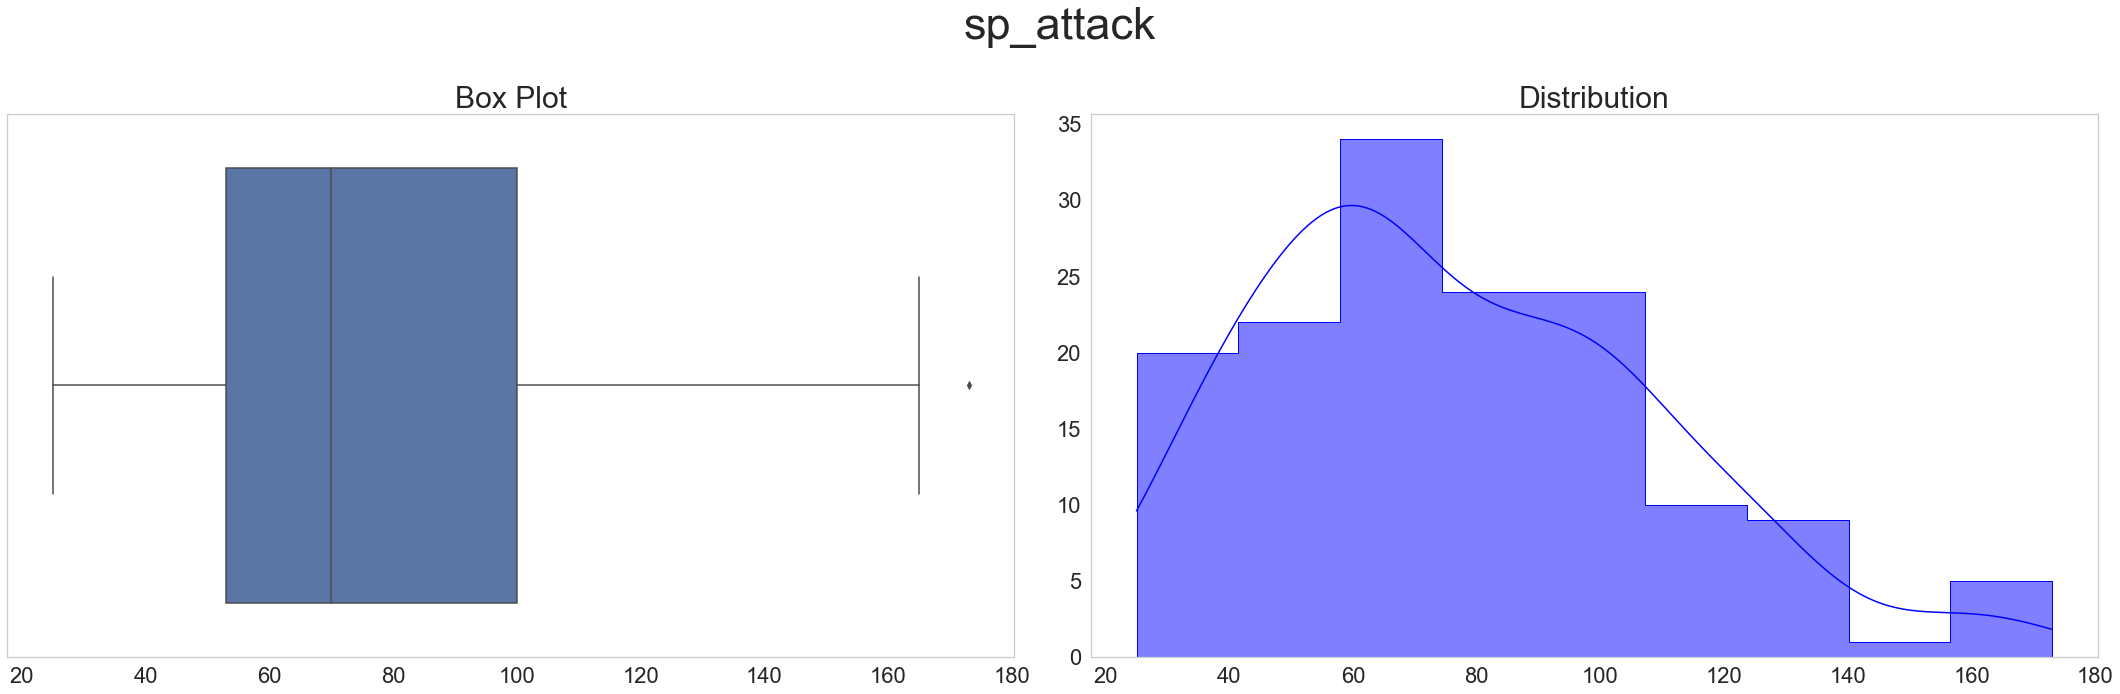

Summary Statistics for sp_attack
count    585.000000
mean      73.490598
std       33.751920
min       10.000000
25%       49.000000
50%       66.000000
75%       95.000000
max      194.000000
Name: sp_attack, dtype: float64


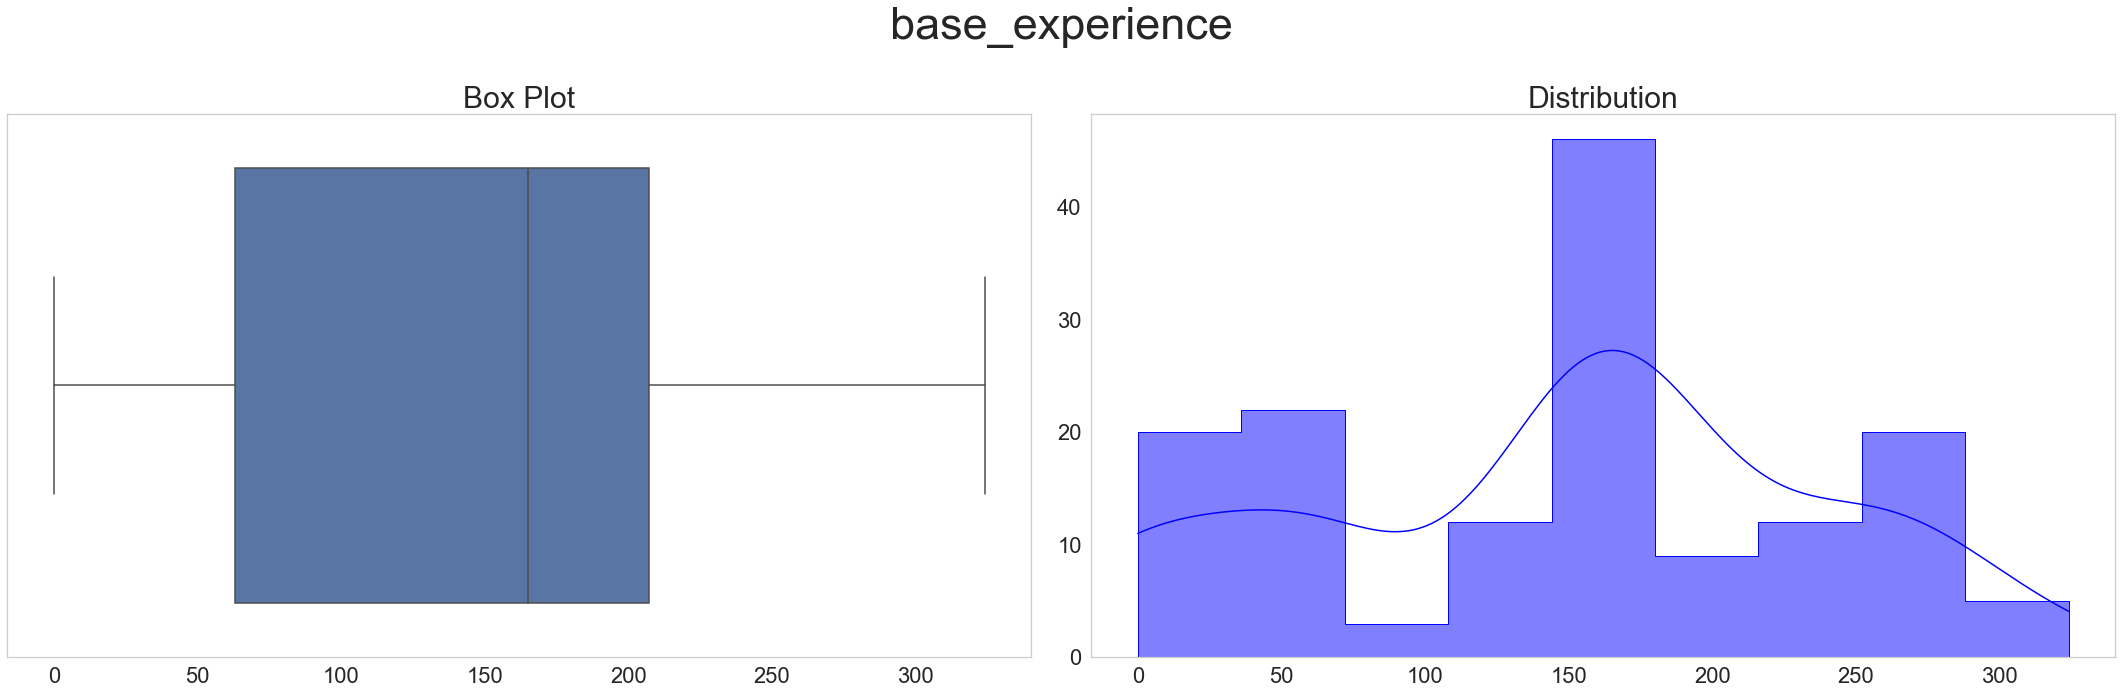

Summary Statistics for base_experience
count    585.000000
mean     137.270085
std       91.200830
min        0.000000
25%       61.000000
50%      144.000000
75%      184.000000
max      608.000000
Name: base_experience, dtype: float64


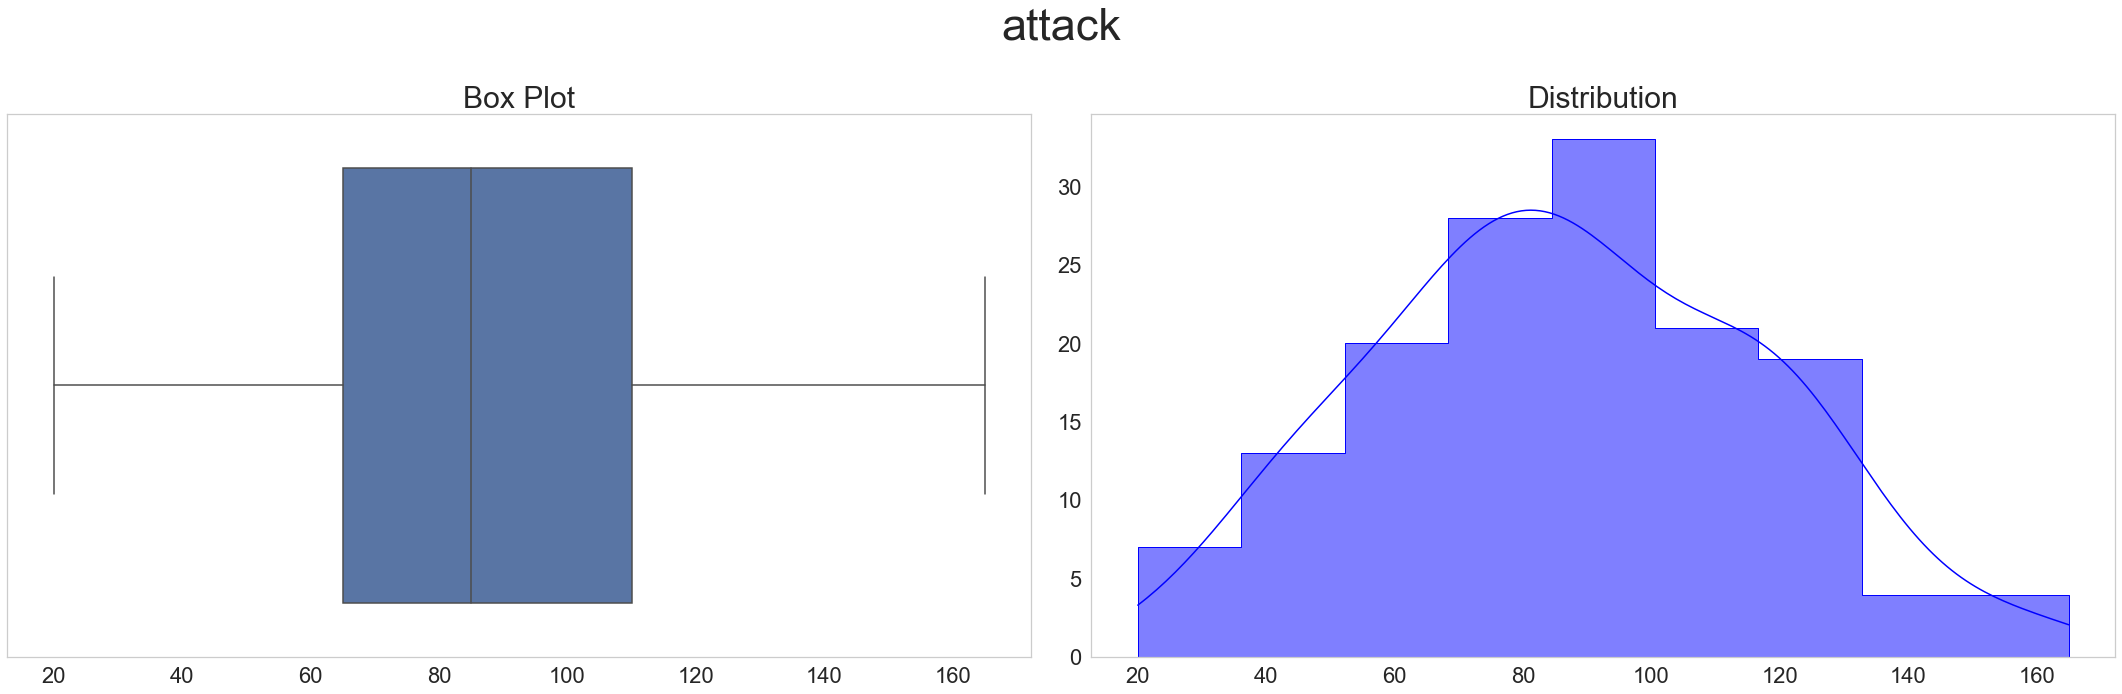

Summary Statistics for attack
count    585.000000
mean      79.993162
std       34.141426
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64


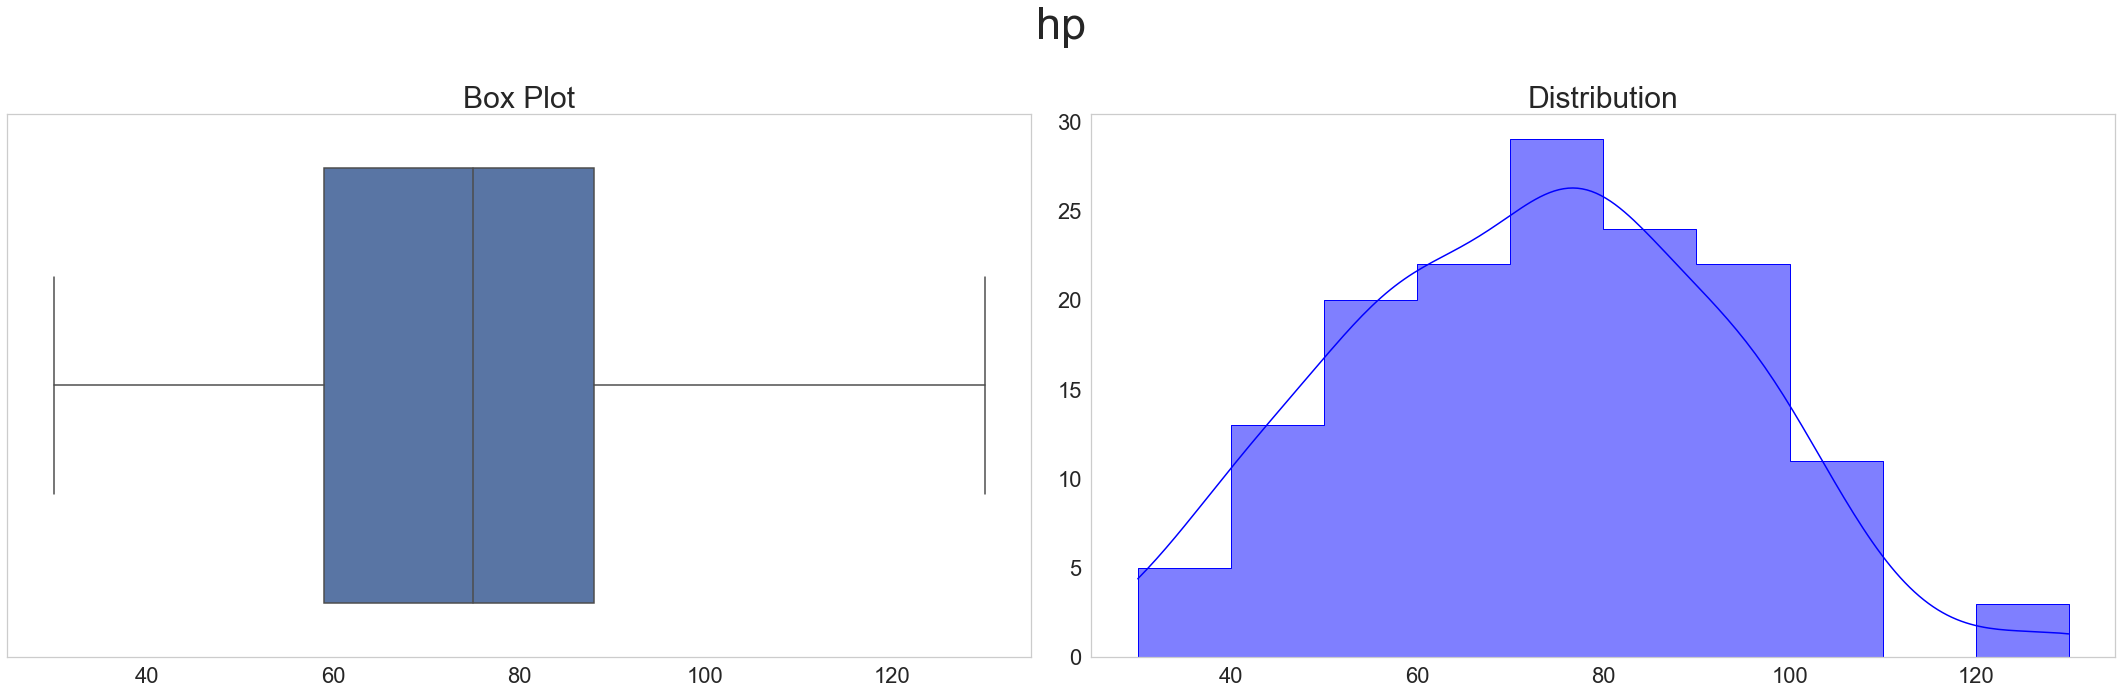

Summary Statistics for hp
count    585.000000
mean      70.234188
std       28.019896
min        1.000000
25%       50.000000
50%       67.000000
75%       85.000000
max      255.000000
Name: hp, dtype: float64


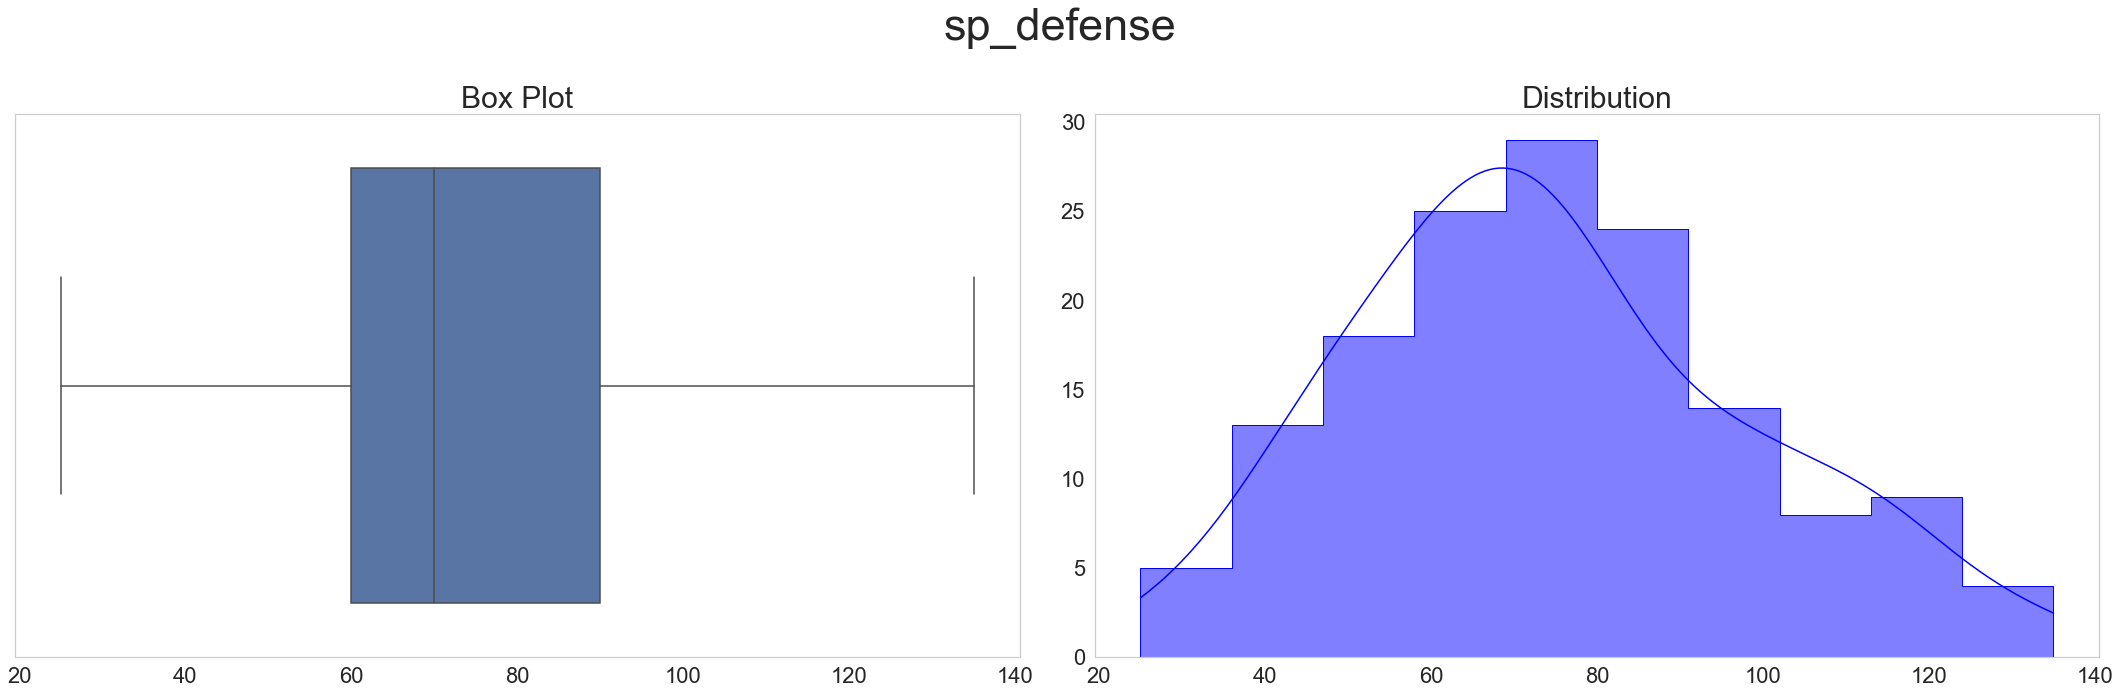

Summary Statistics for sp_defense
count    585.000000
mean      72.377778
std       29.505848
min       20.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      250.000000
Name: sp_defense, dtype: float64


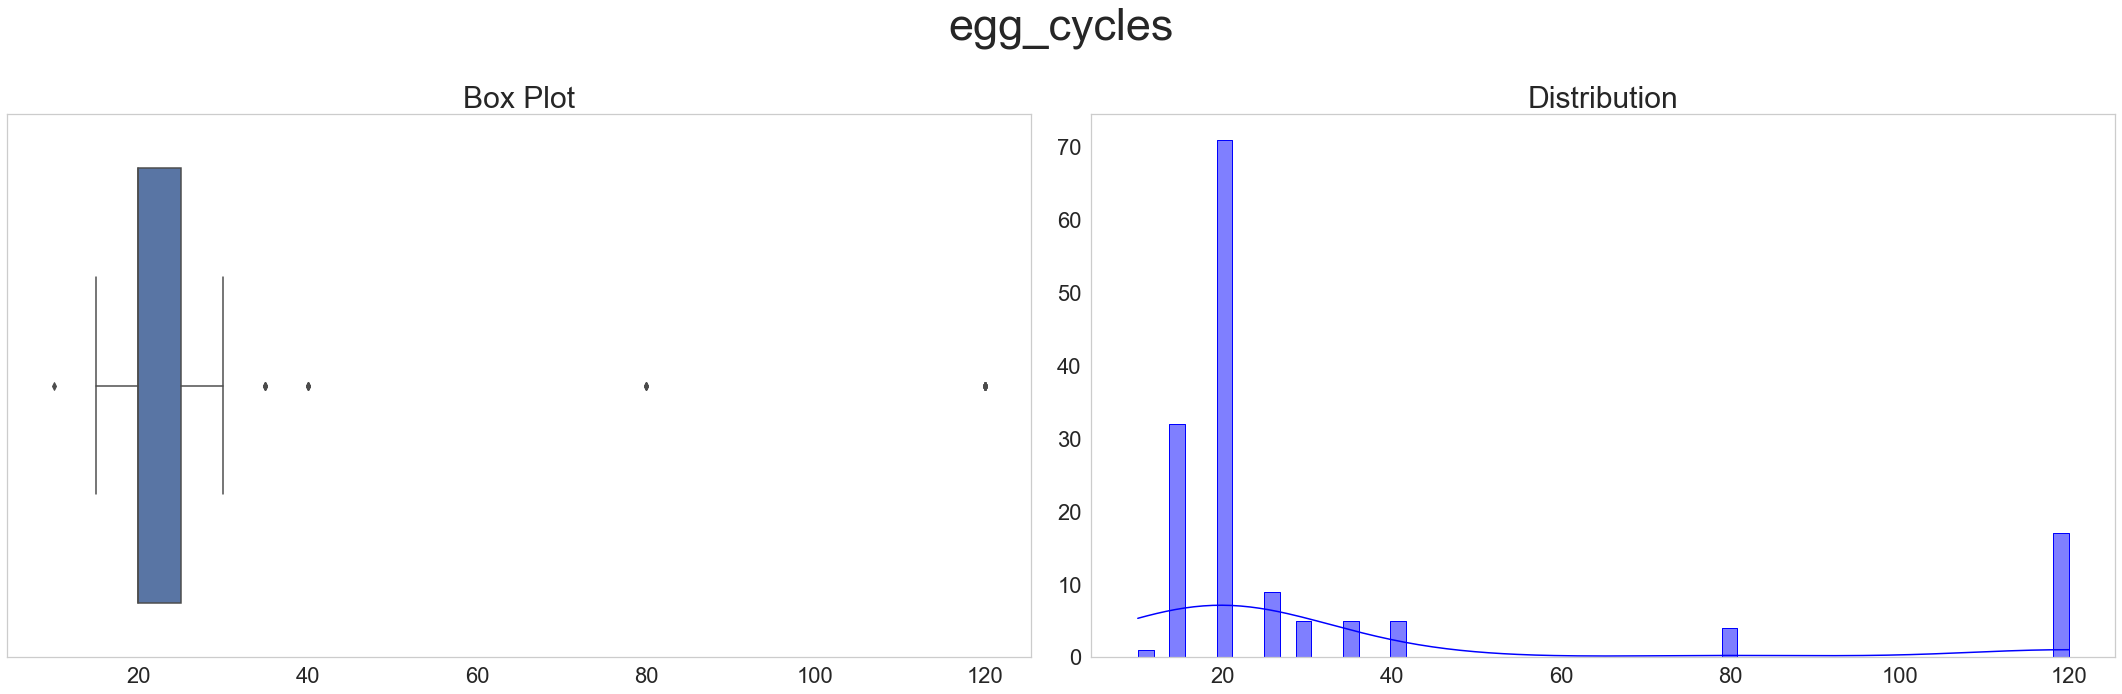

Summary Statistics for egg_cycles
count    585.000000
mean      31.256410
std       30.333521
min        5.000000
25%       20.000000
50%       20.000000
75%       25.000000
max      120.000000
Name: egg_cycles, dtype: float64


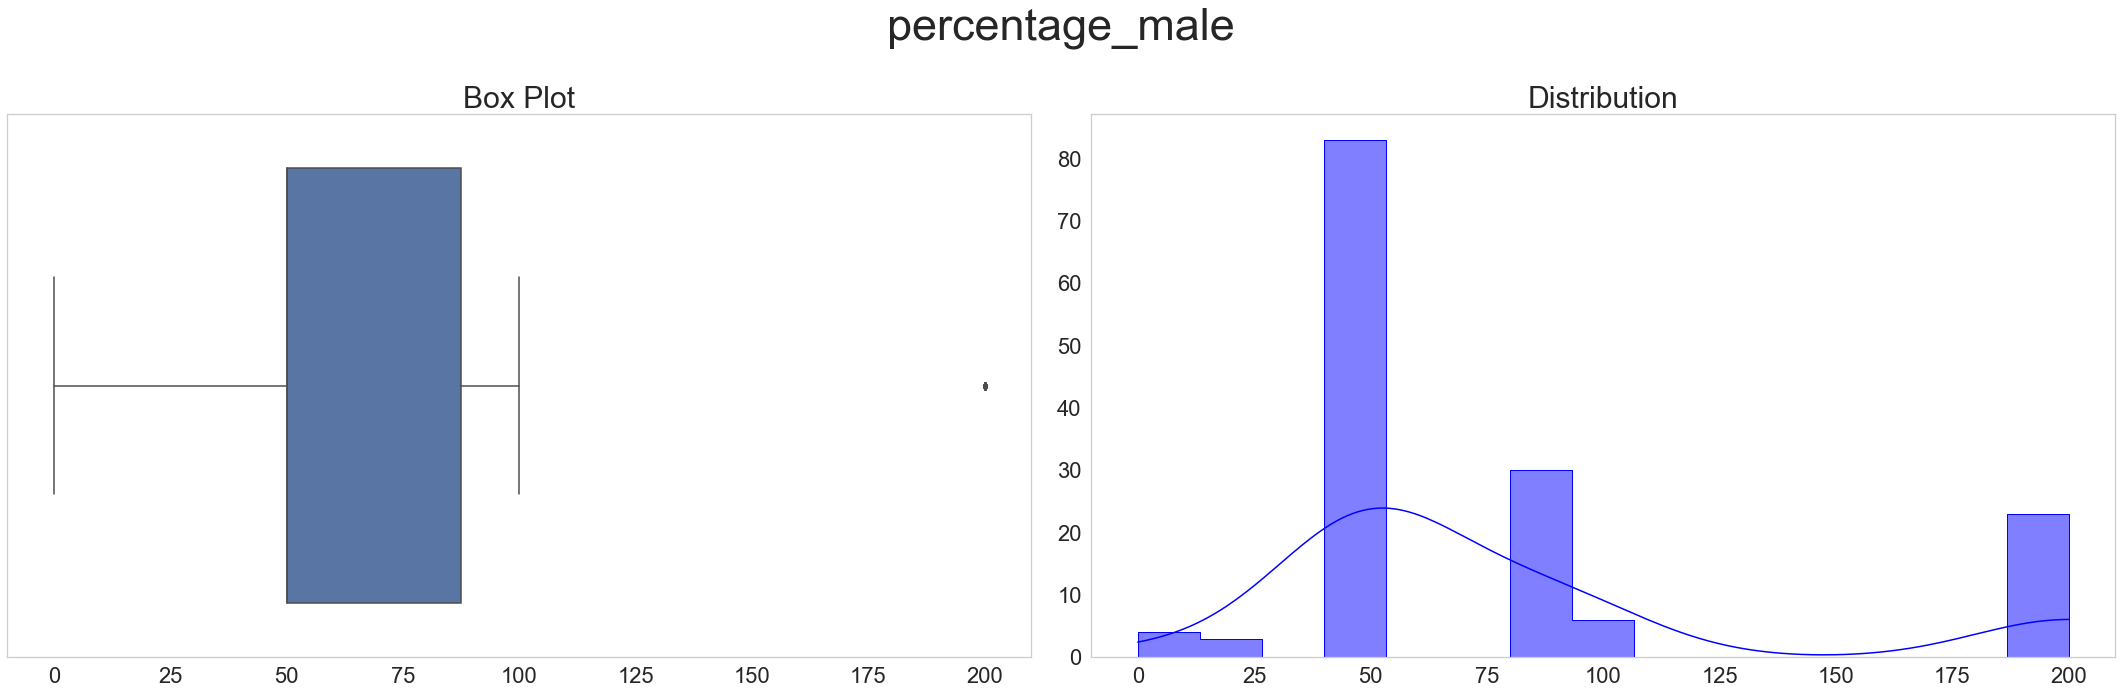

Summary Statistics for percentage_male
count    585.000000
mean      79.722222
std       57.630304
min        0.000000
25%       50.000000
50%       50.000000
75%       87.500000
max      200.000000
Name: percentage_male, dtype: float64


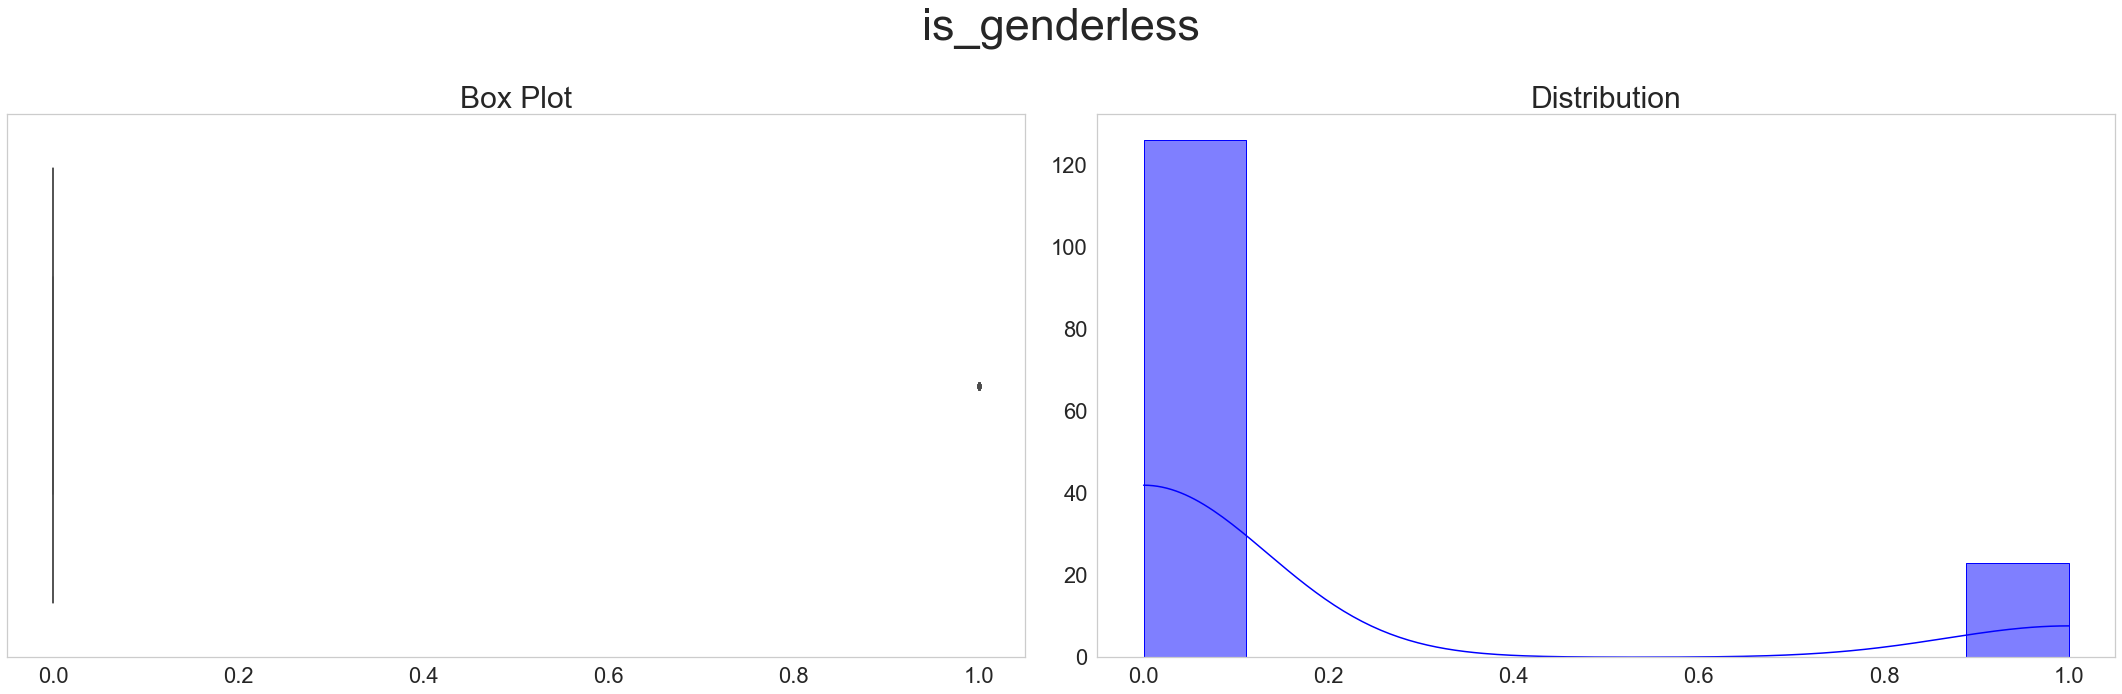

Summary Statistics for is_genderless
count    585.000000
mean       0.170940
std        0.376779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_genderless, dtype: float64


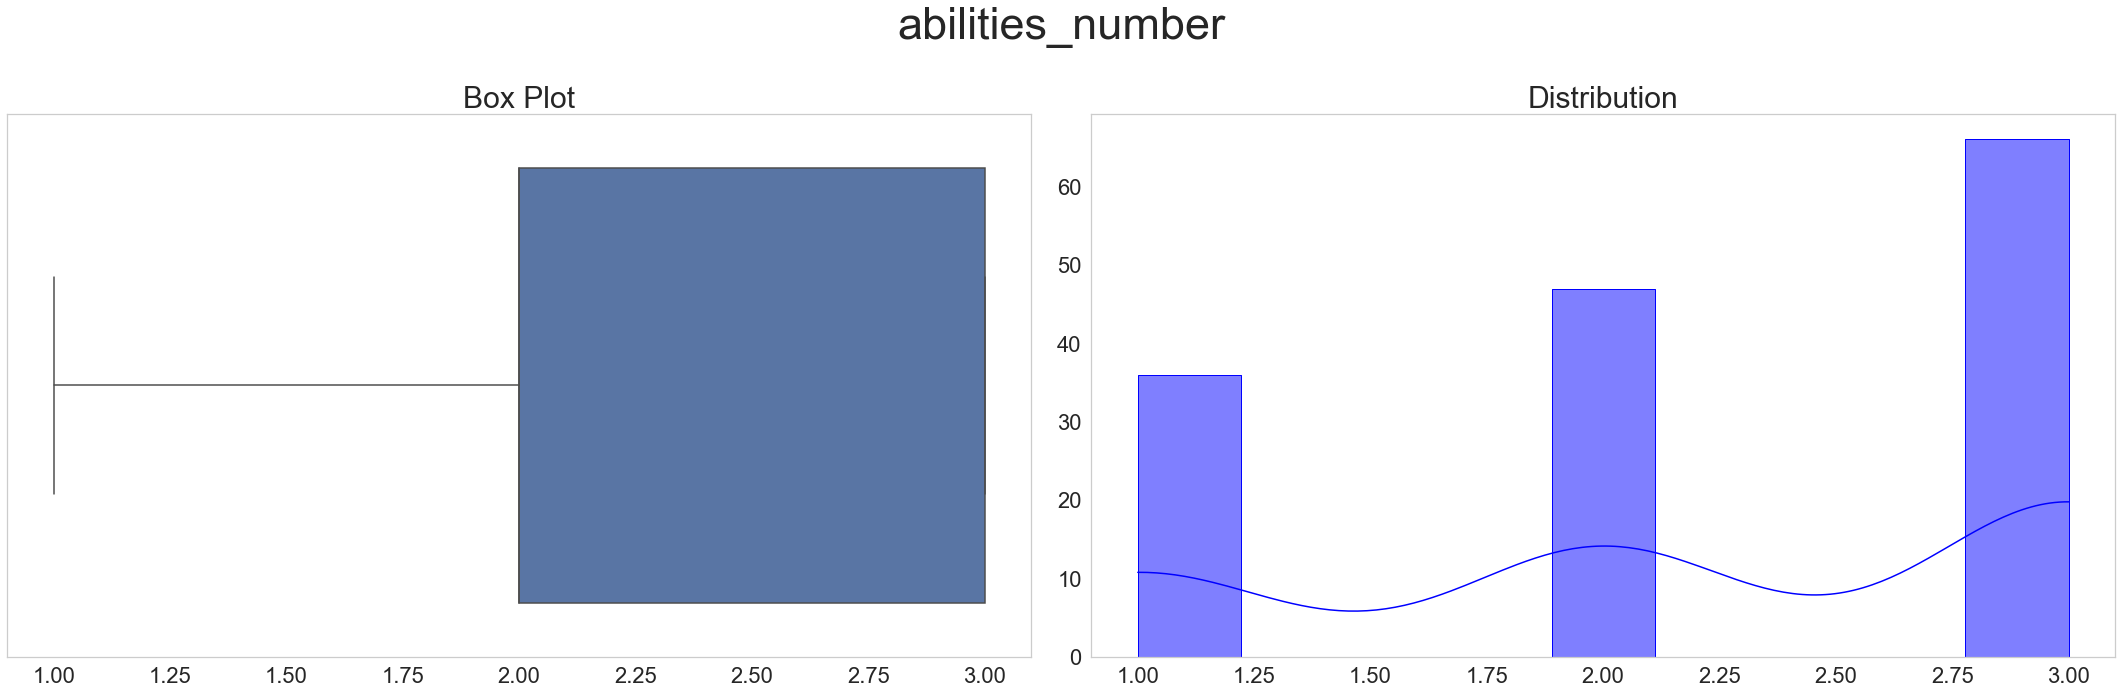

Summary Statistics for abilities_number
count    585.000000
mean       2.246154
std        0.817775
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: abilities_number, dtype: float64


In [90]:
for i in univariate_stuff:
    explore_univariate(corrects, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

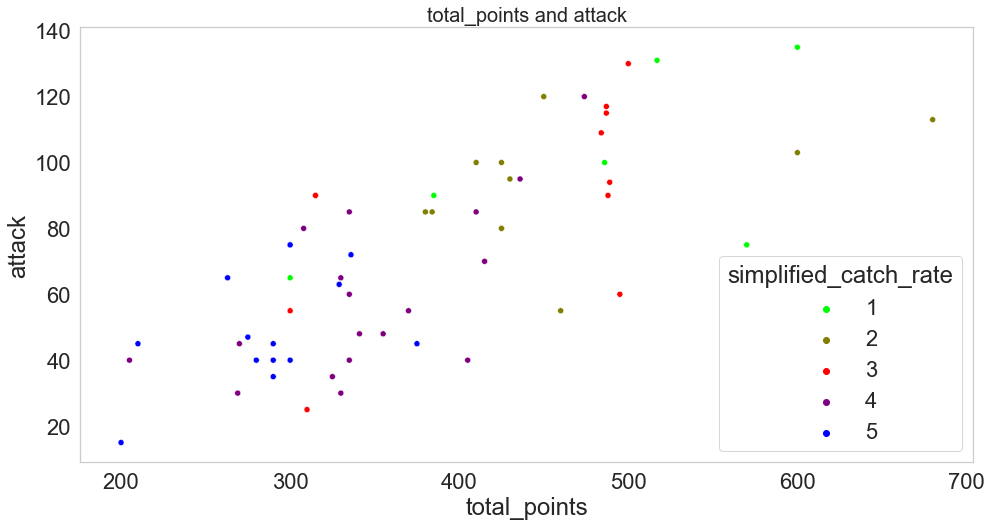

In [92]:
scatterplot(incorrects, 'total_points','attack')

In [94]:
incorrects.simplified_catch_rate.value_counts()

4    18
5    14
2    11
3    11
1     6
Name: simplified_catch_rate, dtype: int64